# Расширение поголовья молочного хозяйства «Вольный луг»

Проект выполянется для молочного хозяйства «Вольный луг», которому необходимо приобрести новых коров. Данные о стаде фермера предоставлены им в датасетах  ```ferma_main.csv``` и ```ferma_dad.csv```, данные о коровах предоставлены ассоциацией пастибищ «ЭкоФерма» в датасете ```cow_buy.csv```.

**Цель исследования:** создать модели машинного обучения, которые помогут принять решение о покупке коров, соответсвующих потребностям фермера(дают не менее 6000 килограммов молока в год, надой от коров вкусный по критериям фермера)


**Ход исследования:**
Данные загружаются из датасетов: ```ferma_main.csv```, ```ferma_dad.csv```, ```cow_buy.csv```. Поскольку качество данных неизвестно, сначала необходимо их изучить. В случае обнаружения ошибок и их влияния на исследование на этапе предобработки данных будет рассмотрены варианты исправления ошибок без искажения конечных результатов. В ходе исследовательского и корреляционного анализа будут выявленные наиболее важные особенности данных, которые помогут с принятием решения об определении необходимых входных признаков и преобразований данных для обучения наиболее точной модели.

<u>Таким образом, исследование пройдет в 7 этапов:</u>
- [Загрузка данных](#one)
- [Обзор данных](#two)
- [Предобработка данных](#three)
- [Исследовательский анализ данных](#four)
- [Корреляционный анализ](#five)
- [Обучение модели линейной регрессии (удой)](#six)
- [Обучение модели логистической регрессии (вкус)](#seven)
- [Написание общего вывода](#eight)

**Описание данных:**
- Данные о молочном хозяйстве фермера из датасета  ```ferma_main.csv``` можно разделить на 4 категории (данные о коровах, о корме, о пастбище и о молоке):
    - id — уникальный идентификатор коровы.
    - Удой- , кг — масса молока, которую корова даёт в год (в килограммах).
    - Порода — порода коровы.
    - порода папы_быка — порода папы коровы.
    - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    
    
    - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    
    
    - Тип пастбища — ландшафт лугов, на которых паслась корова.


    - Жирность,% — содержание жиров в молоке (в процентах).
    - Белок,% — содержание белков в молоке (в процентах).
    - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    
- Данные об отцах коров фермера хранятся в датасете ```ferma_dad.csv```:
    - id — уникальный идентификатор коровы.
    - Имя Папы — имя папы коровы.
- Данные о продаваемых коровах от «ЭкоФермы» хранит датасет ```cow_buy.csv```:
    - Порода — порода коровы.
    - Тип пастбища — ландшафт лугов, на которых паслась корова.
    - порода папы_быка — порода папы коровы.
    - Имя_папы — имя папы коровы.
    - Текущая_жирность,% — содержание жиров в молоке (в процентах).
    - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

<a id='one'></a>
## Загрузка данных

In [1]:
#импортируем библиотки
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import spearmanr, pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
#загрузим датасеты
try:
    ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cows = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    ferma = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
    ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
    cows = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')

<a id='two'></a>
## Обзор данных

In [3]:
#создадим функцию для вывода основной информации по датафреймам
def general_info(df):
    display(df.head(10))
    display(df.info())
    display(df.nunique())

In [4]:
general_info(ferma)

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   
5   6      5254                                  12,7              1806   
6   7      5910                                  13,2              1792   
7   8      6179                                  14,7              1806   
8   9      6783                                  14,2              1918   
9  10      5339                                  13,4              1791   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   
5                                0,885  РефлешнСоверинг    Холмистое   
6                                0,885   Вис Бик Айдиал    Равнинные   
7                                 0,93   Вис Бик Айдиал    Равнинные   
8                                 0,94  РефлешнСоверинг    Холмистое   
9                                0,895   Вис Бик Айдиал    Холмистое   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет  
5          Соверин       3,13   3,078      вкусно  менее_2_лет  
6          Соверин       3,48   3,077      вкусно  более_2_лет  
7           Айдиал       3,55   3,076      вкусно  более_2_лет  
8           Айдиал       3,71   3,077      вкусно  более_2_лет  
9          Соверин       3,13   3,075      вкусно  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

id                                       629
Удой, кг                                 528
ЭКЕ (Энергетическая кормовая единица)     55
Сырой протеин, г                         401
СПО (Сахаро-протеиновое соотношение)      12
Порода                                     2
Тип пастбища                               3
порода папы_быка                           3
Жирность,%                                50
Белок,%                                   15
Вкус молока                                2
Возраст                                    2
dtype: int64

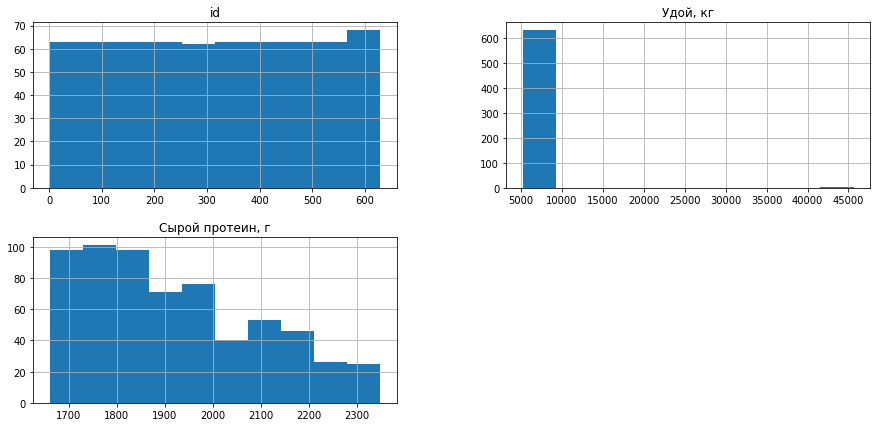

In [5]:
ferma.hist(figsize=(15, 7));

In [6]:
general_info(ferma_dad)

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин
5   6     Барин
6   7  Соловчик
7   8  Геркулес
8   9    Буйный
9  10     Барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

id          629
Имя Папы      4
dtype: int64

In [7]:
general_info(cows)

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   
5  РефлешнСоверинг    равнинное          Соверин  Геркулес               3,63   
6   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
7   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,57   
8  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
9  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет  
5                   3,053  менее_2_лет  
6                   3,076  более_2_лет  
7                   3,079  более_2_лет  
8                   3,074  более_2_лет  
9                   3,079  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

Порода                      2
Тип пастбища                2
порода папы_быка            2
Имя_папы                    4
Текущая_жирность,%         12
Текущий_уровень_белок,%    12
Возраст                     2
dtype: int64

**Выводы:**
- Пропусков в данных нет
- Необходимо заменить названия столбцов во всех датафреймах - привести их к правильному формату: убрать пробелы, заглавные буквы
- Проверить наличие дубликатов, так как количество уникальных id в датафрейме фермы не соответствует количеству строк в нем
- Проверить наличие неявных дубликатов в столбцах в связи с наличием наличием 3 уникальных значениям в типе пастбищ и породе быка, тогда как в датафрейме с коровами для продажи таких уникальных значений всего два
- Изменить тип данных с категориального на числовой в столбцах с числовыми значениями, заменить тип данных в столбцах с бинарными признаками на бинарный тип данных
- Проверить значения в столбце "удой", которые больше основной части значений в 10 раз
- Объединить две таблицы фермера

<a id='three'></a>
##  Предобработка данных

In [8]:
#создадим функцию для проверки пропусков и дубликатов
def data_preprocess(df):
    print(f'Количество пропусков: {df.isna().sum()}')
    print(f'Количество дубликатов: {df.duplicated().sum()}')

In [9]:
data_preprocess(ferma)

Количество пропусков: id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64
Количество дубликатов: 5


In [10]:
data_preprocess(ferma_dad)

Количество пропусков: id          0
Имя Папы    0
dtype: int64
Количество дубликатов: 0


In [11]:
data_preprocess(cows)

Количество пропусков: Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64
Количество дубликатов: 4


In [12]:
cows[cows.duplicated()]

Порода Тип пастбища порода папы_быка  Имя_папы  \
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
8   РефлешнСоверинг    равнинное          Соверин     Барин   
14  РефлешнСоверинг    равнинное          Соверин     Барин   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,% Текущий_уровень_белок,%      Возраст  
6                3,58                   3,076  более_2_лет  
8                3,59                   3,074  более_2_лет  
14               3,59                   3,074  более_2_лет  
19               3,64                   3,074  более_2_лет

Поскольку в данном датафрейме не указано id коровы, предположим, что индекс и будет являться идентификационным номеров. Вполне возможно, что в наборе из 20 коров встретятся животные с одинаковыми характеристисками. Не будем считать их за дубликаты. Удалим дубликаты только из датафрейма ferma:

In [13]:
ferma = ferma.drop_duplicates()
len(ferma)

629

In [14]:
#выведем уникальные значения столбцов для определения неявных дубликатов
ferma['Тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [15]:
ferma['порода папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [16]:
#заменим дублирующие значения
ferma['Тип пастбища'] = ferma['Тип пастбища'].replace('Равнинные', 'Равнинное')
ferma['порода папы_быка'] = ferma['порода папы_быка'].replace('Айдиалл', 'Айдиал')

In [17]:
#приводим к нижнему регистру название пастбищ
ferma['Тип пастбища'] = ferma['Тип пастбища'].apply(lambda x: x.lower())

In [18]:
#замена названий столбцов
ferma.columns = ['id', 'yield_kg', 'feed_unit', 'crude_protein_gr', 'sugar_protein_proportion', 'breed', 'pasture', 'dad_breed', 'milk_fat', 'milk_protein', 'tasty_milk', 'older_than_2']
ferma_dad.columns = ['id', 'dad_name']
cows.columns = ['breed', 'pasture', 'dad_breed', 'dad_name', 'milk_fat', 'milk_protein', 'older_than_2']

In [19]:
#изменение типа данных на float
ferma['feed_unit'] = ferma['feed_unit'].str.replace(',', '.').astype('float')
ferma['sugar_protein_proportion'] = ferma['sugar_protein_proportion'].str.replace(',', '.').astype('float')
ferma['milk_fat'] = ferma['milk_fat'].str.replace(',', '.').astype('float')
ferma['milk_protein'] = ferma['milk_protein'].str.replace(',', '.').astype('float')
cows['milk_fat'] = cows['milk_fat'].str.replace(',', '.').astype('float')
cows['milk_protein'] = cows['milk_protein'].str.replace(',', '.').astype('float')

In [20]:
#изменение типа данных на boolean
ferma['tasty_milk'] = ferma.tasty_milk == 'вкусно'
ferma['older_than_2'] = ferma.older_than_2 == 'более_2_лет'
cows['older_than_2'] = cows.older_than_2 == 'более_2_лет'

In [21]:
#объединение датафреймов
ferma = pd.merge(ferma, ferma_dad, on='id', how='outer')
ferma.head()

id  yield_kg  feed_unit  crude_protein_gr  sugar_protein_proportion  \
0   1      5863       14.2              1743                     0.890   
1   2      5529       12.8              2138                     0.890   
2   3      5810       14.0              1854                     0.885   
3   4      5895       12.4              2012                     0.885   
4   5      5302       12.8              1675                     0.885   

             breed    pasture dad_breed  milk_fat  milk_protein  tasty_milk  \
0   Вис Бик Айдиал  равнинное    Айдиал      3.58         3.076        True   
1   Вис Бик Айдиал  равнинное   Соверин      3.54         3.079        True   
2  РефлешнСоверинг  холмистое   Соверин      3.59         3.074       False   
3  РефлешнСоверинг  холмистое    Айдиал      3.40         3.075       False   
4   Вис Бик Айдиал  равнинное   Соверин      3.73         3.073        True   

   older_than_2  dad_name  
0          True    Буйный  
1         False  Соловчик  
2          True     Барин  
3          True    Буйный  
4         False     Барин

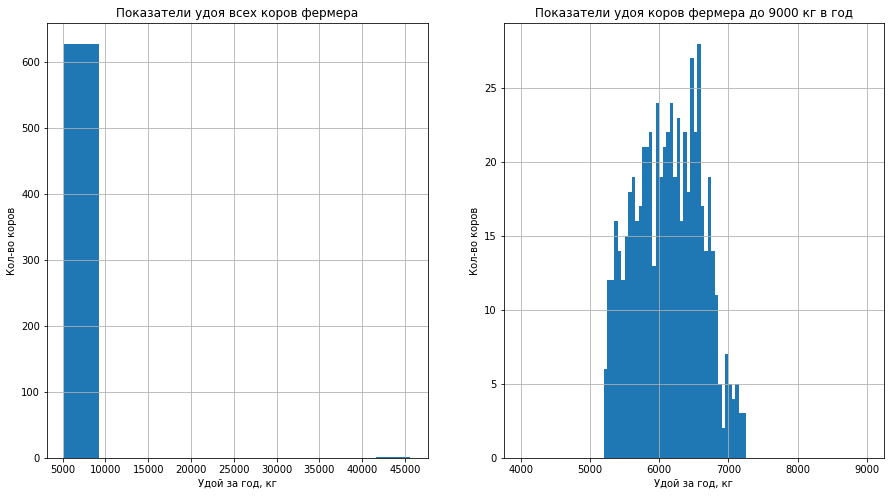

In [22]:
#проверка данных по удою
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(ferma['yield_kg'])
ax[0].set_xlabel('Удой за год, кг')
ax[0].set_ylabel('Кол-во коров')
ax[0].set_title('Показатели удоя всех коров фермера')
ax[0].grid()

ax[1].hist(ferma['yield_kg'], range=(4000, 9000), bins=100)
ax[1].set_xlabel('Удой за год, кг')
ax[1].set_ylabel('Кол-во коров')
ax[1].set_title('Показатели удоя коров фермера до 9000 кг в год')
ax[1].grid()
plt.show()

Есть выбивающиеся значения, которые могли быть неправильно внесенными в базу данными.

In [23]:
ferma[(ferma['yield_kg'] > 40000)]

id  yield_kg  feed_unit  crude_protein_gr  sugar_protein_proportion  \
16  17     45616       11.5              1675                      0.93   

             breed    pasture dad_breed  milk_fat  milk_protein  tasty_milk  \
16  Вис Бик Айдиал  холмистое    Айдиал      3.22         3.076        True   

    older_than_2 dad_name  
16          True   Буйный

In [24]:
ferma.query('5600 < yield_kg < 5700')

id  yield_kg  feed_unit  crude_protein_gr  sugar_protein_proportion  \
19    20      5698       14.3              1759                     0.895   
56    57      5643       13.4              2041                     0.895   
61    62      5639       11.8              1664                     0.895   
80    81      5640       14.9              1849                     0.895   
98    99      5639       14.7              1727                     0.885   
108  109      5617       13.5              1923                     0.890   
113  114      5601       13.3              1888                     0.890   
129  130      5692       12.7              1912                     0.850   
147  148      5672       12.3              1815                     0.840   
149  150      5675       14.1              1814                     0.890   
212  213      5637       12.3              2087                     0.860   
214  215      5604       13.3              1731                     0.880   
239  240      5635       12.9              2059                     0.890   
254  255      5645       13.2              1783                     0.880   
295  296      5698       13.5              1709                     0.840   
311  312      5695       14.5              2049                     0.880   
314  315      5644       12.3              1714                     0.840   
326  327      5657       15.0              1780                     0.890   
333  334      5642       13.8              1692                     0.880   
335  336      5636       14.3              1794                     0.880   
347  348      5613       14.3              1727                     0.890   
358  359      5612       12.9              1691                     0.890   
377  378      5650       11.9              1682                     0.840   
430  431      5694       13.5              1721                     0.880   
467  468      5692       14.1              1809                     0.890   
469  470      5654       14.2              1803                     0.880   
470  471      5638       13.1              2018                     0.880   
486  487      5667       15.3              1666                     0.890   
510  511      5671       15.0              1844                     0.890   
511  512      5632       13.2              1995                     0.850   
516  517      5650       11.9              2200                     0.850   
541  542      5671       12.1              1835                     0.840   
554  555      5686       14.7              1712                     0.860   
587  588      5610       14.7              1671                     0.880   
607  608      5639       13.4              1668                     0.880   

               breed    pasture dad_breed  milk_fat  milk_protein  tasty_milk  \
19   РефлешнСоверинг  холмистое   Соверин      3.49         3.072        True   
56   РефлешнСоверинг  холмистое    Айдиал      3.53         3.077        True   
61   РефлешнСоверинг  холмистое    Айдиал      3.16         3.071        True   
80    Вис Бик Айдиал  равнинное    Айдиал      3.48         3.073       False   
98    Вис Бик Айдиал  равнинное    Айдиал      3.26         3.071       False   
108   Вис Бик Айдиал  равнинное    Айдиал      3.26         3.073       False   
113   Вис Бик Айдиал  холмистое   Соверин      3.57         3.078        True   
129   Вис Бик Айдиал  равнинное   Соверин      3.44         3.074       False   
147   Вис Бик Айдиал  холмистое   Соверин      3.18         3.073        True   
149   Вис Бик Айдиал  равнинное   Соверин      3.59         3.077        True   
212   Вис Бик Айдиал  холмистое    Айдиал      3.42         3.080        True   
214   Вис Бик Айдиал  равнинное   Соверин      3.62         3.074       False   
239   Вис Бик Айдиал  холмистое   Соверин      3.62         3.076        True   
254  РефлешнСоверинг  холмистое   Соверин      3.63         3.075       False   
295   Вис Бик Айди

In [25]:
ferma.query('feed_unit <12')

id  yield_kg  feed_unit  crude_protein_gr  sugar_protein_proportion  \
16    17     45616       11.5              1675                     0.930   
30    31      5242       11.8              1764                     0.885   
61    62      5639       11.8              1664                     0.895   
120  121      5784       11.8              1664                     0.890   
156  157      5714       11.8              1849                     0.860   
211  212      5415       11.9              1711                     0.860   
284  285      5735       11.8              1712                     0.840   
355  356      5342       11.9              1743                     0.890   
377  378      5650       11.9              1682                     0.840   
398  399      5257       11.9              1793                     0.890   
407  408      5392       11.9              1827                     0.890   
456  457      5288       11.1              1925                     0.880   
479  480      5535       11.8              1683                     0.840   
516  517      5650       11.9              2200                     0.850   
564  565      5542       11.9              1662                     0.840   
576  577      5376       11.7              1825                     0.860   
579  580      5469       11.9              1876                     0.860   
581  582      5573       10.9              1955                     0.840   
591  592      5520       11.9              1785                     0.880   

               breed    pasture dad_breed  milk_fat  milk_protein  tasty_milk  \
16    Вис Бик Айдиал  холмистое    Айдиал      3.22         3.076        True   
30    Вис Бик Айдиал  холмистое    Айдиал      3.21         3.078        True   
61   РефлешнСоверинг  холмистое    Айдиал      3.16         3.071        True   
120   Вис Бик Айдиал  равнинное   Соверин      3.44         3.073       False   
156   Вис Бик Айдиал  холмистое    Айдиал      3.44         3.080        True   
211   Вис Бик Айдиал  равнинное    Айдиал      3.42         3.073       False   
284  РефлешнСоверинг  холмистое   Соверин      3.13         3.077        True   
355   Вис Бик Айдиал  холмистое   Соверин      3.18         3.076        True   
377   Вис Бик Айдиал  равнинное   Соверин      3.22         3.073       False   
398   Вис Бик Айдиал  равнинное   Соверин      3.48         3.075        True   
407   Вис Бик Айдиал  равнинное   Соверин      3.59         3.078        True   
456  РефлешнСоверинг  равнинное   Соверин      3.33         3.074       False   
479   Вис Бик Айдиал  равнинное   Соверин      3.22         3.077       False   
516   Вис Бик Айдиал  холмистое    Айдиал      3.23         3.079        True   
564   Вис Бик Айдиал  равнинное   Соверин      3.28         3.074       False   
576  РефлешнСоверинг  равнинное   Соверин      2.99         3.076       False   
579   Вис Бик Айдиал  холмистое   Соверин      3.64         3.076        True   
581   Вис Бик Айдиал  холмистое   Соверин      3.39         3.079        True   
591   Вис Бик Айдиал  равнинное   Соверин      3.12         3.073       False   

     older_than_2  dad_name  
16           True    Буйный  
30          False     Барин  
61           True     Барин  
120          True     Барин  
156          True    Буйный  
211         False    Буйный  
284          True     Барин  
355         False  Соловчик  
377          True     Барин  
398         False     Барин  
407         False  Соловчик  
456         False     Барин  
479         False     Барин  
516          True    Буйный  
564         False     Барин  
576         False  Соловчик  
579         False     Барин  
581         False     Барин  
591         False  Соловчик

In [26]:
ferma.query('sugar_protein_proportion > 0.9 and feed_unit < 14')

id  yield_kg  feed_unit  crude_protein_gr  sugar_protein_proportion  \
16    17     45616       11.5              1675                      0.93   
36    37      6150       13.8              1702                      0.93   
42    43      6033       13.9              1717                      0.93   
74    75      6173       13.9              1703                      0.93   
109  110      6414       13.9              1808                      0.93   
132  133      6267       13.9              2246                      0.94   
213  214      6081       13.6              1816                      0.93   
243  244      6108       13.7              1682                      0.93   
325  326      6140       13.9              1699                      0.93   
360  361      6133       13.3              1960                      0.93   
362  363      6122       13.5              2041                      0.93   
374  375      6492       13.9              1969                      0.94   
379  380      6416       13.7              2211                      0.94   
380  381      6018       13.9              1980                      0.93   
382  383      6060       13.9              1705                      0.93   
402  403      6153       13.5              2169                      0.94   
414  415      6293       13.5              2249                      0.94   
416  417      6479       13.6              2206                      0.94   
429  430      6139       13.9              1853                      0.94   
439  440      6342       13.4              1821                      0.93   
450  451      6030       13.8              1801                      0.94   
472  473      6547       13.7              2341                      0.94   
487  488      6005       13.5              1842                      0.94   
512  513      6122       13.4              1843                      0.93   
557  558      6214       13.9              1959                      0.93   
560  561      6517       13.4              2199                      0.94   
573  574      6246       13.3              1754                      0.93   
575  576      6013       13.4              1900                      0.94   
594  595      6053       13.8              1753                      0.93   
601  602      6188       13.7              1744                      0.94   
603  604      6289       13.4              1899                      0.94   

               breed    pasture dad_breed  milk_fat  milk_protein  tasty_milk  \
16    Вис Бик Айдиал  холмистое    Айдиал      3.22         3.076        True   
36    Вис Бик Айдиал  холмистое    Айдиал      3.11         3.074        True   
42   РефлешнСоверинг  холмистое    Айдиал      3.72         3.078       False   
74   РефлешнСоверинг  холмистое    Айдиал      3.48         3.074       False   
109   Вис Бик Айдиал  равнинное    Айдиал      3.73         3.078        True   
132   Вис Бик Айдиал  холмистое   Соверин      3.73         3.075        True   
213   Вис Бик Айдиал  равнинное   Соверин      3.72         3.074       False   
243   Вис Бик Айдиал  равнинное    Айдиал      3.63         3.076       False   
325   Вис Бик Айдиал  равнинное   Соверин      3.37         3.079       False   
360   Вис Бик Айдиал  равнинное    Айдиал      3.65         3.076        True   
362   Вис Бик Айдиал  холмистое    Айдиал      3.65         3.075       False   
374  РефлешнСоверинг  равнинное    Айдиал      3.74         3.077        True   
379  РефлешнСоверинг  равнинное   Соверин      3.72         3.073        True   
380   Вис Бик Айдиал  холмистое    Айдиал      3.65         3.075        True   
382  РефлешнСоверинг  холмистое    Айдиал      3.65         3.072       False   
402   Вис Бик Айдиал  равнинное    Айдиал      3.59         3.078       False   
414   Вис Бик Айдиал  холмистое    Айдиал      3.59         3.079        True   
416   Вис Бик Айдиал  холмистое    Айдиал      3.61         3.078        True   
42

Средние показатели удойности голштинсшой породы, к которой относятся коровы линии Вис Бик Айдиал и РефлешнСоверинг, дают в среднем [от 6 до 7,5 тысяч кг молока в год](https://cyberleninka.ru/article/n/produktivnost-korov-golshtinskoy-porody), данные показатели [не превышают 15 тыс. кг в год](https://cyberleninka.ru/article/n/molochnaya-produktivnost-korov-raznyh-vetvey-osnovnyh-liniy-golshtinskoy-porody), поэтому показатель в 45 тыс кг. в год от одной коровы явно аномальный. При этом желательно оставить информацию по данной корове, так как ее молоко квалифицировали как вкусное. 

Предположим, что при внесении данных показатель стал в 10 раз больше из-за опечатки. Удойность коровы в год превышает 5000 кг, поэтому показатель 4500, который получится, если разделить значение на 10, маловероятен. Вероятнее всего, при введении данных случайно была нажата цифра 4 вместе с 5 и настоящее значение удойности 5600 кг в год, что коррелирует с другими показателями, ЭКЕ которых 11-12. 

In [27]:
#изменим аномальное значение 
ferma.loc[16, 'yield_kg'] = 5616

In [28]:
print(ferma.info())
cows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        629 non-null    int64  
 1   yield_kg                  629 non-null    int64  
 2   feed_unit                 629 non-null    float64
 3   crude_protein_gr          629 non-null    int64  
 4   sugar_protein_proportion  629 non-null    float64
 5   breed                     629 non-null    object 
 6   pasture                   629 non-null    object 
 7   dad_breed                 629 non-null    object 
 8   milk_fat                  629 non-null    float64
 9   milk_protein              629 non-null    float64
 10  tasty_milk                629 non-null    bool   
 11  older_than_2              629 non-null    bool   
 12  dad_name                  629 non-null    object 
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 76.4+ K

**Вывод:**
- При проверке не были обнаружены пропуски, но были обнаружены и удалены явные дубликаты 
- Были обнаружены и устранены неявные дубликаты в столбцах с породой быка, а также типом пастбища
- Были изменены названия столбцов для упрощения работы: был устранены лишние символы и проблемы, переименованы названия 
- Были изменены типы данных - числовые значения были приведены к вещественному типу данных, а столбцы с бинарными признаками к бинарному типу данных
- Добавлен столбец с именем папы коровы к осноному датафрейму с данными из фермы
- Изменено аномальное значение из столбца с удоем

<a id='four'></a>
## Исследовательский анализ данных

### Характеристики коровы

#### Порода

In [29]:
breed_fr = ferma['breed'].value_counts()
display(breed_fr)
round(breed_fr / ferma['breed'].count() *100, 1)

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: breed, dtype: int64

Вис Бик Айдиал     59.3
РефлешнСоверинг    40.7
Name: breed, dtype: float64

In [30]:
breed_cows_fr = cows['breed'].value_counts()
display(breed_cows_fr)
round(breed_cows_fr / cows['breed'].count() *100, 1)

РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: breed, dtype: int64

РефлешнСоверинг    55.0
Вис Бик Айдиал     45.0
Name: breed, dtype: float64

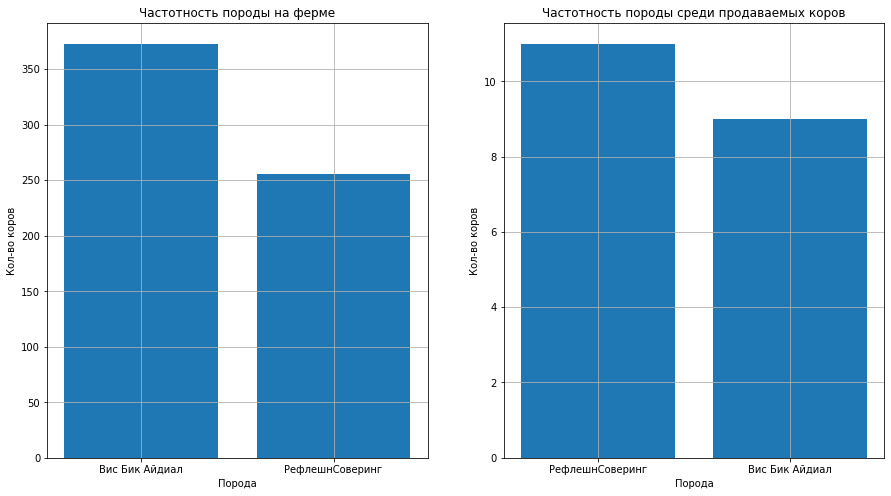

In [31]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].bar(breed_fr.index, breed_fr.values)
ax[0].set_xlabel('Порода')
ax[0].set_ylabel('Кол-во коров')
ax[0].set_title('Частотность породы на ферме')
ax[0].grid()

ax[1].bar(breed_cows_fr.index, breed_cows_fr.values)
ax[1].set_xlabel('Порода')
ax[1].set_ylabel('Кол-во коров')
ax[1].set_title('Частотность породы среди продаваемых коров')
ax[1].grid()
plt.show()

#### Имя папы и порода папы

In [32]:
dad_breed_fr = ferma['dad_breed'].value_counts()
print(dad_breed_fr)
print()
print(round(dad_breed_fr / ferma['dad_breed'].count() *100, 1))
print()
dad_breed_cows_fr = cows['dad_breed'].value_counts()
print(dad_breed_cows_fr)
round(dad_breed_cows_fr / cows['dad_breed'].count() *100, 1)

Айдиал     318
Соверин    311
Name: dad_breed, dtype: int64

Айдиал     50.6
Соверин    49.4
Name: dad_breed, dtype: float64

Соверин    12
Айдиал      8
Name: dad_breed, dtype: int64


Соверин    60.0
Айдиал     40.0
Name: dad_breed, dtype: float64

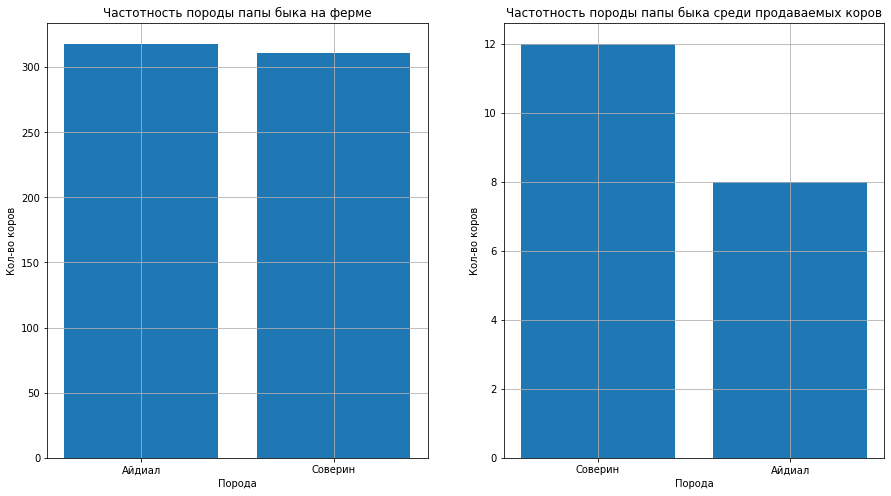

In [33]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].bar(dad_breed_fr.index, dad_breed_fr.values)
ax[0].set_xlabel('Порода')
ax[0].set_ylabel('Кол-во коров')
ax[0].set_title('Частотность породы папы быка на ферме')
ax[0].grid()

ax[1].bar(dad_breed_cows_fr.index, dad_breed_cows_fr.values)
ax[1].set_xlabel('Порода')
ax[1].set_ylabel('Кол-во коров')
ax[1].set_title('Частотность породы папы быка среди продаваемых коров')
ax[1].grid()
plt.show()

In [34]:
dad_name_fr = ferma['dad_name'].value_counts()
print(dad_name_fr)
print()
print(round(dad_name_fr / ferma['dad_name'].count() *100, 1))
print()
dad_name_cows_fr = cows['dad_name'].value_counts()
print(dad_name_cows_fr)
round(dad_name_cows_fr / cows['dad_name'].count() *100, 1)

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: dad_name, dtype: int64

Барин       38.2
Буйный      34.2
Соловчик    17.5
Геркулес    10.2
Name: dad_name, dtype: float64

Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: dad_name, dtype: int64


Буйный      40.0
Геркулес    30.0
Барин       20.0
Соловчик    10.0
Name: dad_name, dtype: float64

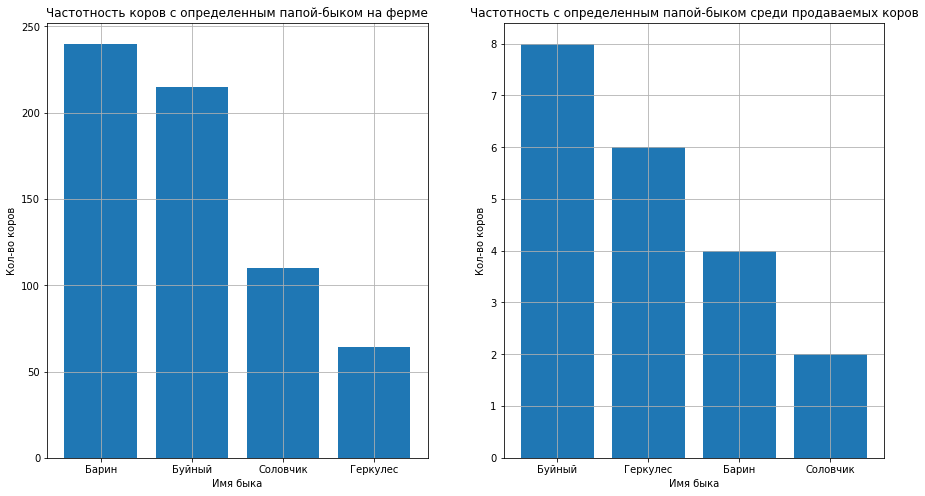

In [35]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].bar(dad_name_fr.index, dad_name_fr.values)
ax[0].set_xlabel('Имя быка')
ax[0].set_ylabel('Кол-во коров')
ax[0].set_title('Частотность коров с определенным папой-быком на ферме')
ax[0].grid()

ax[1].bar(dad_name_cows_fr.index, dad_name_cows_fr.values)
ax[1].set_xlabel('Имя быка')
ax[1].set_ylabel('Кол-во коров')
ax[1].set_title('Частотность с определенным папой-быком среди продаваемых коров')
ax[1].grid()
plt.show()

#### Возраст

In [36]:
age_fr = ferma['older_than_2'].value_counts()
print(age_fr)
print()
print(round(age_fr / ferma['older_than_2'].count() *100, 1))
print()
age_cows_fr = cows['older_than_2'].value_counts()
print(age_cows_fr)
round(age_cows_fr / cows['older_than_2'].count() *100, 1)

True     519
False    110
Name: older_than_2, dtype: int64

True     82.5
False    17.5
Name: older_than_2, dtype: float64

True     15
False     5
Name: older_than_2, dtype: int64


True     75.0
False    25.0
Name: older_than_2, dtype: float64

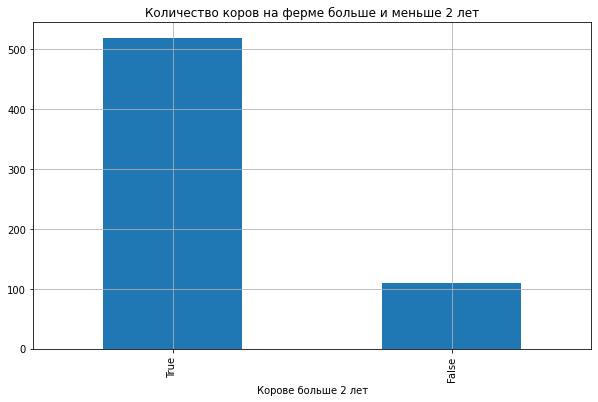

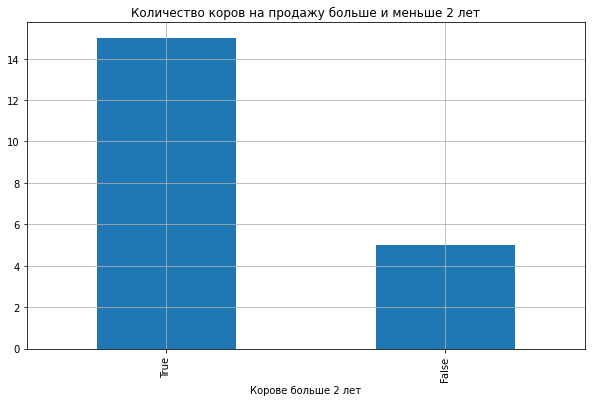

In [37]:
age_fr.plot(kind='bar', xlabel='Корове больше 2 лет', figsize=(10, 6), grid=True)
plt.title('Количество коров на ферме больше и меньше 2 лет')
plt.show()

age_cows_fr.plot(kind='bar', xlabel='Корове больше 2 лет', figsize=(10, 6), grid=True)
plt.title('Количество коров на продажу больше и меньше 2 лет');

### Характеристики корма

#### ЭКЕ - энергетическая кормовая единица

In [38]:
ferma['feed_unit'].describe()

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: feed_unit, dtype: float64

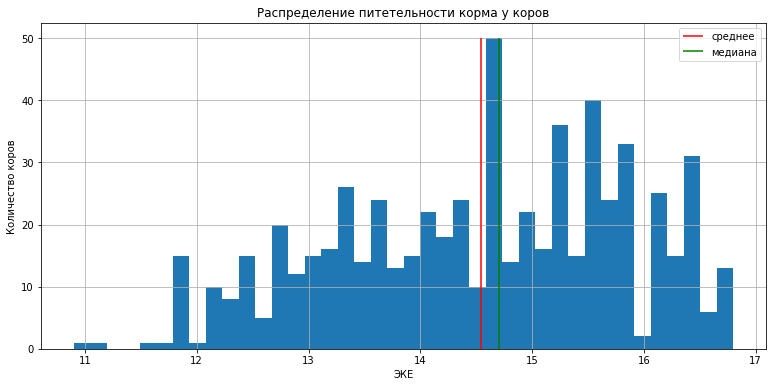

In [39]:
ferma['feed_unit'].hist(figsize=(13, 6), bins= 40)
plt.vlines(ferma['feed_unit'].mean(), ymin=0, ymax=50, color='red', label='среднее')
plt.vlines(ferma['feed_unit'].median(), ymin=0, ymax=50, color='green', label='медиана')
plt.title('Распределение питетельности корма у коров')
plt.xlabel('ЭКЕ')
plt.ylabel('Количество коров')
plt.legend()
plt.show()

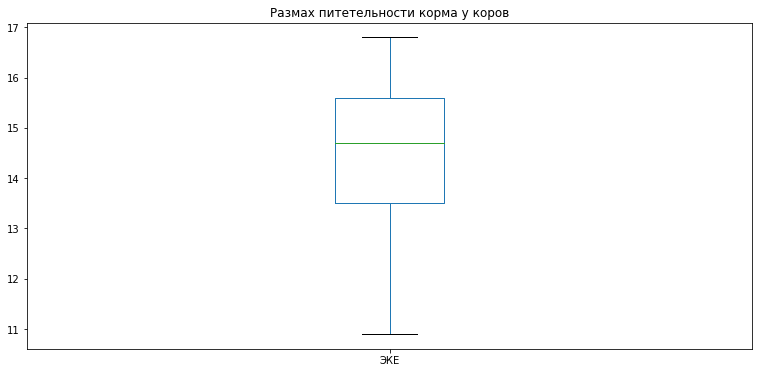

In [40]:
ferma['feed_unit'].plot.box(figsize=(13, 6), label='ЭКЕ')
plt.title('Размах питетельности корма у коров')
plt.show()

#### Сырой протеин в граммах

In [41]:
ferma['crude_protein_gr'].describe()

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: crude_protein_gr, dtype: float64

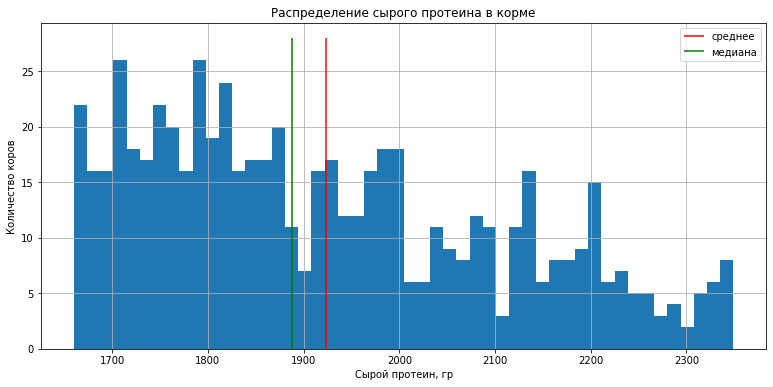

In [42]:
ferma['crude_protein_gr'].hist(figsize=(13, 6), bins= 50)
plt.vlines(ferma['crude_protein_gr'].mean(), ymin=0, ymax=28, color='red', label='среднее')
plt.vlines(ferma['crude_protein_gr'].median(), ymin=0, ymax=28, color='green', label='медиана')
plt.title('Распределение сырого протеина в корме')
plt.xlabel('Сырой протеин, гр')
plt.ylabel('Количество коров')
plt.legend()
plt.show()

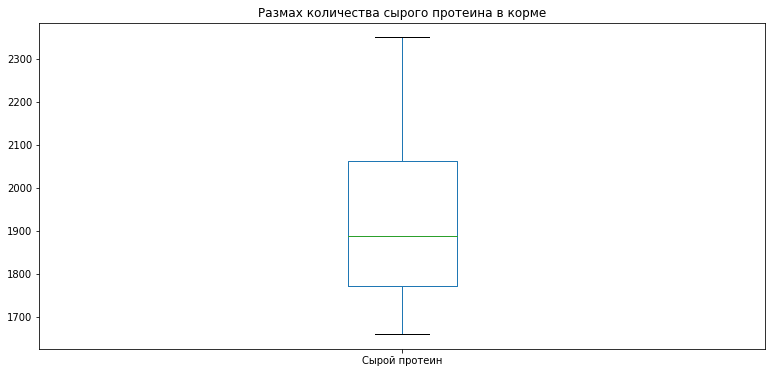

In [43]:
ferma['crude_protein_gr'].plot.box(figsize=(13, 6), label='Сырой протеин')
plt.title('Размах количества сырого протеина в корме')
plt.show()

#### СПО - сахаро-протеиновое отношение

In [44]:
ferma['sugar_protein_proportion'].describe()

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_proportion, dtype: float64

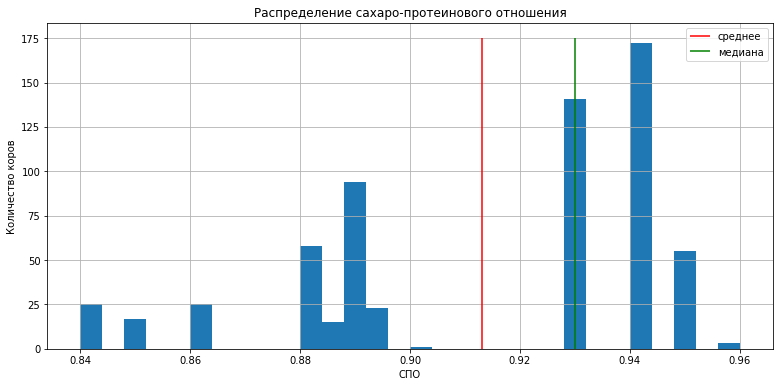

In [45]:
ferma['sugar_protein_proportion'].hist(figsize=(13, 6), bins= 30)
plt.vlines(ferma['sugar_protein_proportion'].mean(), ymin=0, ymax=175, color='red', label='среднее')
plt.vlines(ferma['sugar_protein_proportion'].median(), ymin=0, ymax=175, color='green', label='медиана')
plt.title('Распределение сахаро-протеинового отношения')
plt.xlabel('СПО')
plt.ylabel('Количество коров')
plt.legend()
plt.show()

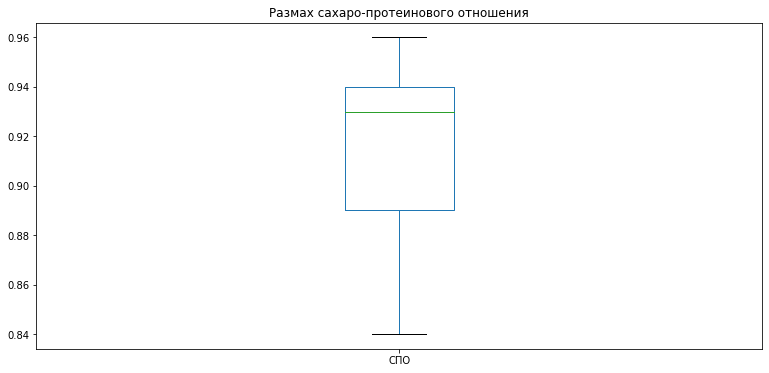

In [46]:
ferma['sugar_protein_proportion'].plot.box(figsize=(13, 6), label='СПО')
plt.title('Размах сахаро-протеинового отношения')
plt.show()

### Характеристики пастбища

In [47]:
pasture_fr = ferma['pasture'].value_counts()
print(pasture_fr)
print()
print(round(pasture_fr / ferma['pasture'].count() *100, 1))
print()
pasture_cows_fr = cows['pasture'].value_counts()
print(pasture_cows_fr)
round(pasture_cows_fr / cows['pasture'].count() *100, 1)

холмистое    351
равнинное    278
Name: pasture, dtype: int64

холмистое    55.8
равнинное    44.2
Name: pasture, dtype: float64

равнинное    11
холмистое     9
Name: pasture, dtype: int64


равнинное    55.0
холмистое    45.0
Name: pasture, dtype: float64

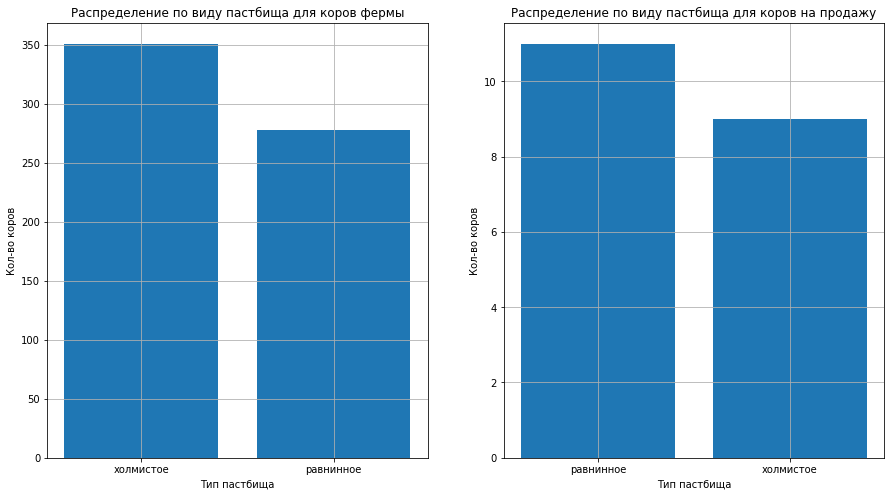

In [48]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].bar(pasture_fr.index, pasture_fr.values)
ax[0].set_xlabel('Тип пастбища')
ax[0].set_ylabel('Кол-во коров')
ax[0].set_title('Распределение по виду пастбища для коров фермы')
ax[0].grid()

ax[1].bar(pasture_cows_fr.index, pasture_cows_fr.values)
ax[1].set_xlabel('Тип пастбища')
ax[1].set_ylabel('Кол-во коров')
ax[1].set_title('Распределение по виду пастбища для коров на продажу')
ax[1].grid()
plt.show()

### Характеристики молока

#### Удой в кг - целевой признак

In [49]:
ferma['yield_kg'].describe()

count     629.000000
mean     6125.157393
std       475.912622
min      5204.000000
25%      5746.000000
50%      6132.000000
75%      6501.000000
max      7222.000000
Name: yield_kg, dtype: float64

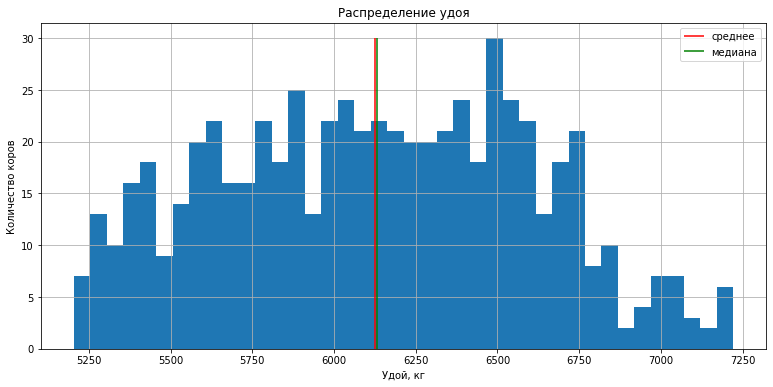

In [50]:
ferma['yield_kg'].hist(figsize=(13, 6), bins= 40)
plt.vlines(ferma['yield_kg'].mean(), ymin=0, ymax=30, color='red', label='среднее')
plt.vlines(ferma['yield_kg'].median(), ymin=0, ymax=30, color='green', label='медиана')
plt.title('Распределение удоя')
plt.xlabel('Удой, кг')
plt.ylabel('Количество коров')
plt.legend()
plt.show()

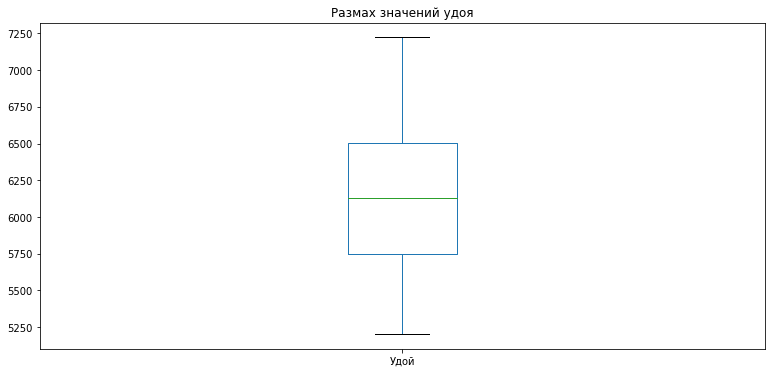

In [51]:
ferma['yield_kg'].plot.box(figsize=(13, 6), label='Удой')
plt.title('Размах значений удоя')
plt.show()

#### Жирность в %

In [52]:
ferma['milk_fat'].describe()

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: milk_fat, dtype: float64

In [53]:
cows['milk_fat'].describe()

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: milk_fat, dtype: float64

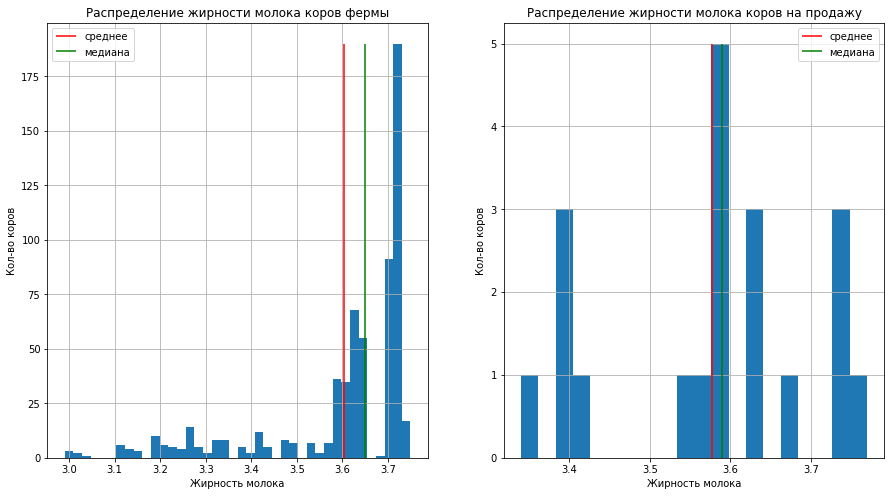

In [54]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(ferma['milk_fat'], bins=40)
ax[0].vlines(ferma['milk_fat'].mean(), ymin=0, ymax=190, color='red', label='среднее')
ax[0].vlines(ferma['milk_fat'].median(), ymin=0, ymax=190, color='green', label='медиана')
ax[0].set_xlabel('Жирность молока')
ax[0].set_ylabel('Кол-во коров')
ax[0].set_title('Распределение жирности молока коров фермы')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].hist(cows['milk_fat'], bins=20)
ax[1].vlines(cows['milk_fat'].mean(), ymin=0, ymax=5, color='red', label='среднее')
ax[1].vlines(cows['milk_fat'].median(), ymin=0, ymax=5, color='green', label='медиана')
ax[1].set_xlabel('Жирность молока')
ax[1].set_ylabel('Кол-во коров')
ax[1].set_title('Распределение жирности молока коров на продажу')
ax[1].legend()
ax[1].grid()
plt.show()

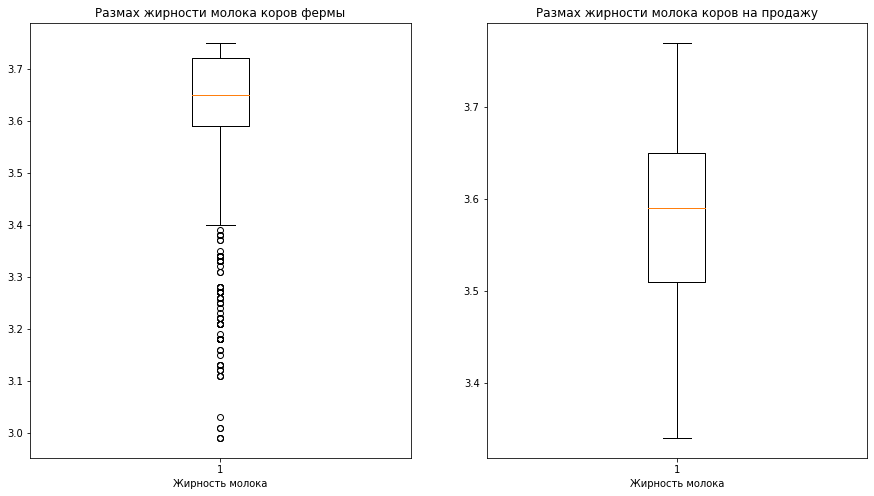

In [55]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ax[0].boxplot(ferma['milk_fat'])
ax[0].set_xlabel('Жирность молока')
ax[0].set_title('Размах жирности молока коров фермы')

ax[1].boxplot(cows['milk_fat'])
ax[1].set_xlabel('Жирность молока')
ax[1].set_title('Размах жирности молока коров на продажу')
plt.show()

#### Белок в %

In [56]:
ferma['milk_protein'].describe()

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: milk_protein, dtype: float64

In [57]:
cows['milk_protein'].describe()

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: milk_protein, dtype: float64

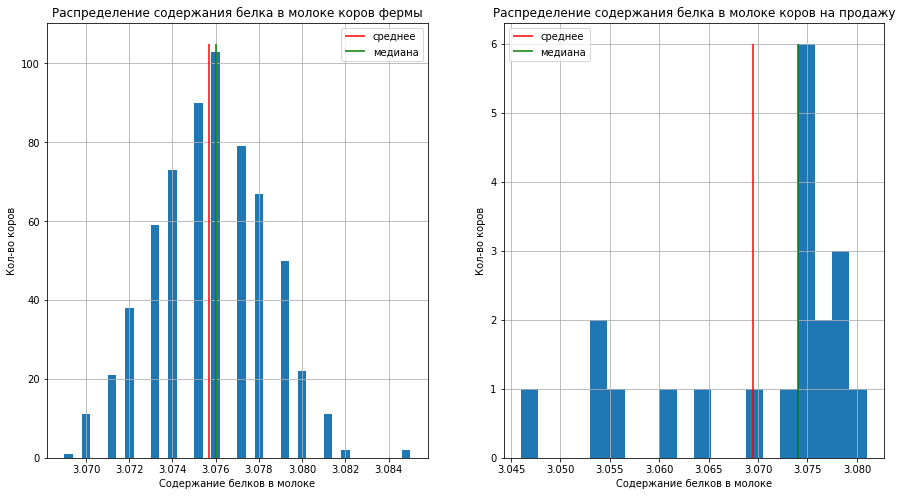

In [58]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(ferma['milk_protein'], bins=40)
ax[0].vlines(ferma['milk_protein'].mean(), ymin=0, ymax=105, color='red', label='среднее')
ax[0].vlines(ferma['milk_protein'].median(), ymin=0, ymax=105, color='green', label='медиана')
ax[0].set_xlabel('Содержание белков в молоке')
ax[0].set_ylabel('Кол-во коров')
ax[0].set_title('Распределение содержания белка в молоке коров фермы')
ax[0].legend()
ax[0].grid()

ax[1].hist(cows['milk_protein'], bins=20)
ax[1].vlines(cows['milk_protein'].mean(), ymin=0, ymax=6, color='red', label='среднее')
ax[1].vlines(cows['milk_protein'].median(), ymin=0, ymax=6, color='green', label='медиана')
ax[1].set_xlabel('Содержание белков в молоке')
ax[1].set_ylabel('Кол-во коров')
ax[1].set_title('Распределение содержания белка в молоке коров на продажу')
ax[1].legend()
ax[1].grid()
plt.show()

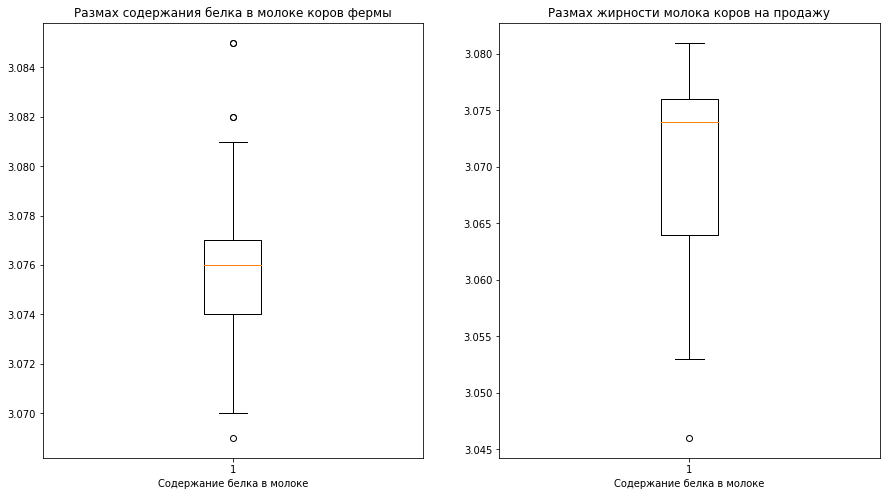

In [59]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ax[0].boxplot(ferma['milk_protein'])
ax[0].set_xlabel('Содержание белка в молоке')
ax[0].set_title('Размах содержания белка в молоке коров фермы')

ax[1].boxplot(cows['milk_protein'])
ax[1].set_xlabel('Содержание белка в молоке')
ax[1].set_title('Размах жирности молока коров на продажу')
plt.show()

#### Вкус молока - целевой признак

In [60]:
taste_fr = ferma['tasty_milk'].value_counts()
print(taste_fr)
round(taste_fr / ferma['tasty_milk'].count() *100, 1)

True     371
False    258
Name: tasty_milk, dtype: int64


True     59.0
False    41.0
Name: tasty_milk, dtype: float64

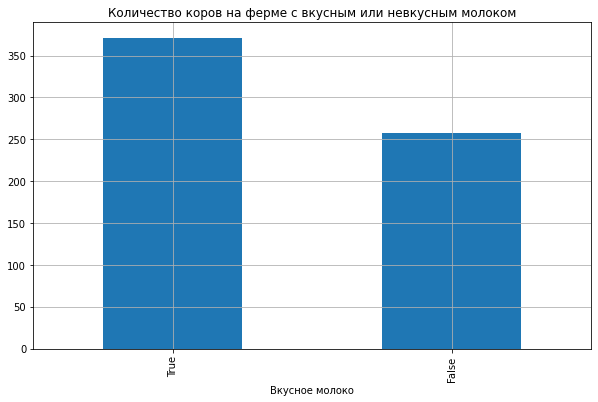

In [61]:
taste_fr.plot(kind='bar', xlabel='Вкусное молоко', figsize=(10, 6), grid=True)
plt.title('Количество коров на ферме с вкусным или невкусным молоком')
plt.show()

**Вывод:**

<u>Характристики коров:</u> 
1. Хотя распределение коров по породе примерно поровну (60/40, 55/45), среди коров фермера чаще встречаются коровы породы Айдиал, а среди коров на продажу - Соверинг. 
2. Подобное распределение мы видим и среди быков-пап: среди коров фермера породы отцов коров распределны практически поровну (51/49) с незначительным перевесом в сторону породы Айдиал, что значит, что у некоторых коров породы Айдиал отец породы Соверин. Среди коров на продажу больше коров с отцами породы Соверин (60/40), при этом также встречается некоторое несовпадние по породе отца-быка и коровы. 
3. Больше половины поголовья фермера составляют коровы, чьи папы Барин и Буйный. Среди коров на продажу больше всего таких, чьи отцы Буйный или Геркулес. 
4. Абсолютное большинство коров (75%-82%) старше 2 лет.

<u>Характеристики пастбища</u>: распределение коров, которые пасутся на равнинном и холмистом пастбищах, одинаково (55/45) и близко к половине. Среди коров фермера преобладают коровы с холмистого пастбища, среди коров на продажу - равнинного. 

<u>Характеристика корма:</u>
1. График показателя питательности корма ЭКЕ смещен вправо, то есть у большего числа коров питательность корма больше, при этом между медианой и средним не такая большая разница, что означает, что разброс между показателем не очень велик (от 11 до 17 единиц с концентрацией большинства значений в диапазоне от 14), выбросов у этого показателя нет. Среднее значение - 14.6. То есть корм большинства коров питательный. 
2. График сырого протеина смещен влево, то есть у большего числа коров меньшее содержание сырого белка в корме, среднее значение - около 1900 г. График более плоский, о чем свидетельствует более удлиненный хвост справа, то есть число содержания сырого белка более разнообразно, возможно, подбирается индивидуально в связи с особенностями коровы. Выбросов нет. 
3. График смещен вправо, слева есть два блока, соответствующие длинному хвосту - значения 0.84-0.86, а также 0.88-0.9. Пик приходится на значение 0.94, тогда как медиана приходится на 0.93, а среднее на 0.91. В соответствии с «Нормами и рационами кормления сельскохозяйственных животных» (2003) сахаро-протеиновое отношение в рационах лактирующих коров должно быть в пределах 0,8–1,1. Для усвоения коровами протеина, на 1 грамм протеина должно приходиться 1 грамм сахара, таким образом, СПО в корме коров в рамках нормы и у большинства близится к предпочитаемому показателю - единице. Выбросов нет.
4. Необычное распределениие данных может быть связано с особенностями коров или спецификой их кормления. 

<u>Характеристика молока:</u>
1. Выбросов нет, значения удоя распределены нормально, без асимметрий, медиана и среднее практически совпадают и примерно равно 6130 кг. 
2. График жирности молока коров фермера смещен вправо, большинство коров дают молоко жирностью 3.6-3.7%, при этом есть длинный хвост слева с меньшими значениями. Выбросы в графике оставляем, поскольку они являются частью реальных данных, которые нужны для построения более точной модели. Жирность молока коров на продажу распределена нормально со средним значением 3.6.
3. Процент белка в молоке коров фермера распределен нормально, разница между медианой и средним незначительна, среднее значение равно 3.076. Ящик с усами показал наличие выбросов, однако, данные не являются аномальными, такие показатели могли быть зафиксированы фермером, а значит их также необходимо учитывать в исследовании. В основном разброс значений от 3.07 до 3.08. Значения содержания белка в молоке коров меньше - разброс среди данных значительнее: от 3.045 до 3.08, только у 3/4 коров в молоке белок в том же диапазоне, что и у фермера, что может указывать на различие в питании. Медианное значение - 3.074.
4. Около 60% коров на ферме дают вкусное молоко.

В корреляционном анализе стоит учитывать, что только значения удоя и процента белка в молоке распределены нормально, в остальных признаках есть смещения, также встречаются выбросы, но их незначительное количество и они не очень далеко от основных значений. Большое число выбросов присутствует только в жирности молока. Улучшить данные можно при помощи категоризации - деления данных по определенным категориям и поиске линейных связей между подкатегориями. Другим способом приведение в нормальное распределение является смягчение асимметрии путем взяли логарифма одного из значений или удаление выбросов. 

<a id='five'></a>
## Корреляционный анализ

Рассмотрим матрицу диаграмм рассеяния для определения наличия явной линейной зависимости между количествнными данными. Целевым признаком модели линейной регрессии является удой.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


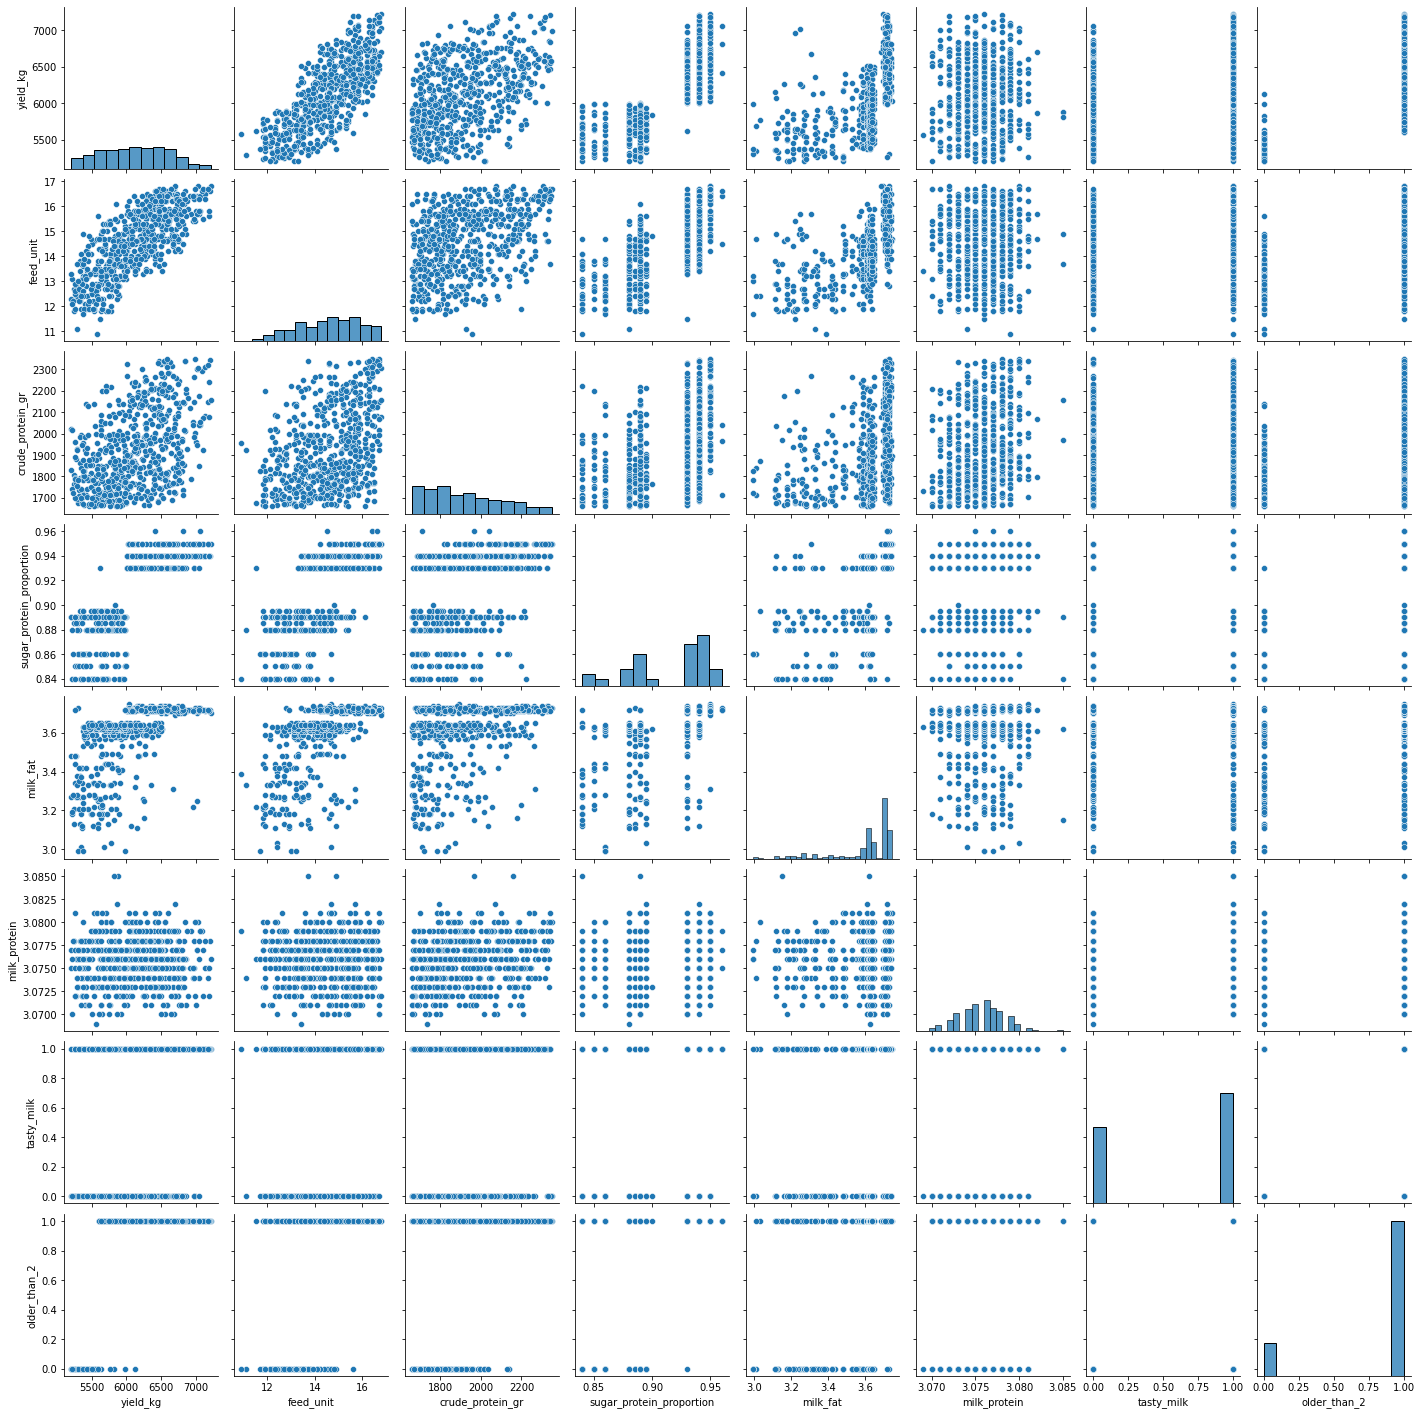

In [62]:
sns_plot = sns.pairplot(ferma.drop('id', axis=1))

Возможная линейная зависимость есть между удоем и ЭКЕ (возможно, что точки распределены в виде дуги, то есть связь может быть нелинейной), сырым протеином, СПО, жирностью молока, а также возрастом коровы. Рассмотрим по отдельности с учетом значений категориальных признаков.

### Удой и ЭКЕ

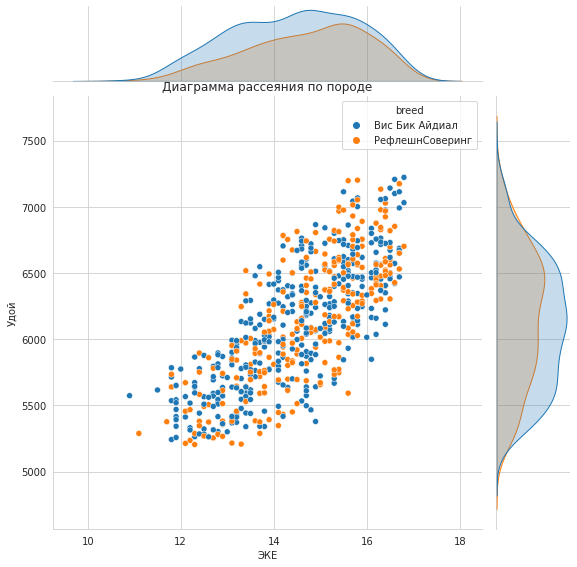

In [63]:
sns.set_style("whitegrid")

g = sns.jointplot(data=ferma, x='feed_unit', y='yield_kg', hue='breed', height=8)
g.ax_joint.set_xlabel('ЭКЕ')
g.ax_joint.set_ylabel('Удой')
g.ax_joint.set_title('Диаграмма рассеяния по породе')

plt.show()

In [64]:
#создадим функцию для визуализации зависимости
def visual(x_col, hue, label):
    h = sns.lmplot(data=ferma, x=x_col, y='yield_kg', hue=hue, height=7)
    h.set_axis_labels(label, 'Удой')
    plt.show()

In [65]:
#создаем функцию для вычисления силы зависимости
def correlation(x_col, hue, mean1, mean2):
    r_1, p_p_1 = pearsonr(ferma.loc[ferma[hue] == mean1, 'yield_kg'], ferma.loc[ferma[hue] == mean1, x_col])
    r_2, p_p_2 = pearsonr(ferma.loc[ferma[hue] == mean2, 'yield_kg'], ferma.loc[ferma[hue] == mean2, x_col])
    
    rho_1, p_s_1 = spearmanr(ferma.loc[ferma[hue] == mean1, 'yield_kg'], ferma.loc[ferma[hue] == mean1, x_col])
    rho_2, p_s_2 = spearmanr(ferma.loc[ferma[hue] == mean2, 'yield_kg'], ferma.loc[ferma[hue] == mean2, x_col])
    
    differ_1 = r_1 - rho_1
    differ_2 = r_2 - rho_2
    
    if abs(differ_1) > 0.05:
        print(f'Корреляция между значением {mean1} по Пирсону равно {r_1.round(2)}, по Спирмену равно {rho_1.round(2)}')
    elif rho_1.round(2) == r_1.round(2):
        print(f'Корреляция по признаку {mean1} равна {rho_1.round(2)}')
    elif p_s_1 > p_p_1:
        print(f'Корреляция Спирмена по признаку {mean1} равна {rho_1.round(2)}')
    elif p_p_1 > p_s_1:
        print(f'Корреляция Пирсона по признаку {mean1} равна {r_1.round(2)}')
        
    if abs(differ_2) > 0.05:
        print(f'Корреляция между значением {mean2} по Пирсону равно {r_2.round(2)}, по Спирмену равно {rho_2.round(2)}')
    elif rho_2.round(2) == r_2.round(2):
        print(f'Корреляция по признаку {mean2} равна {rho_2.round(2)}')
    elif p_s_2 > p_p_2:
        print(f'Корреляция Спирмена по признаку {mean2} равна {rho_2.round(2)}')
    elif p_p_2 > p_s_2:
        print(f'Корреляция Пирсона по признаку {mean2} равна {r_2.round(2)}')
        
    if p_p_1 > 0.05:
        print(f'P-value по Пирсону по признаку {mean1} равен: {p_p_1}')
    elif p_p_2 > 0.05:
        print(f'P-value по Пирсону по признаку {mean2} равен: {p_p_2}')
    elif p_s_1 > 0.05:
        print(f'P-value по Спирмену по признаку {mean1} равен: {p_s_1}')
    elif p_s_2 > 0.05:
        print(f'P-value по Спирмену по признаку {mean2} равен: {p_s_2}')
    else:
        print(f'P-value меньше 5%')

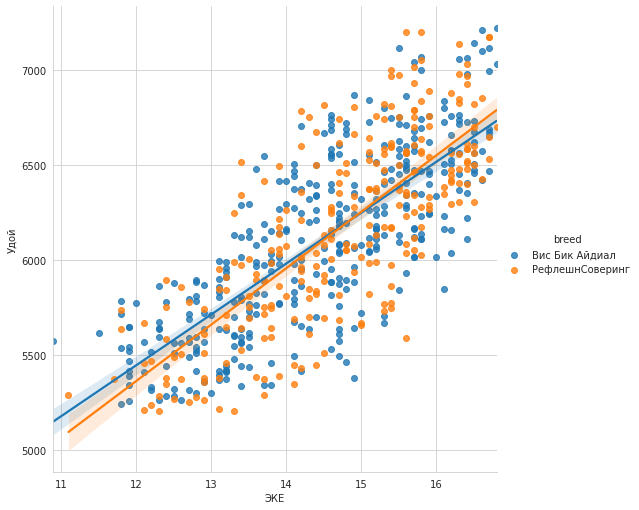

Корреляция по признаку Вис Бик Айдиал равна 0.77
Корреляция по признаку РефлешнСоверинг равна 0.76
P-value меньше 5%


In [66]:
visual('feed_unit', 'breed', 'ЭКЕ')

correlation('feed_unit', 'breed', 'Вис Бик Айдиал', 'РефлешнСоверинг')

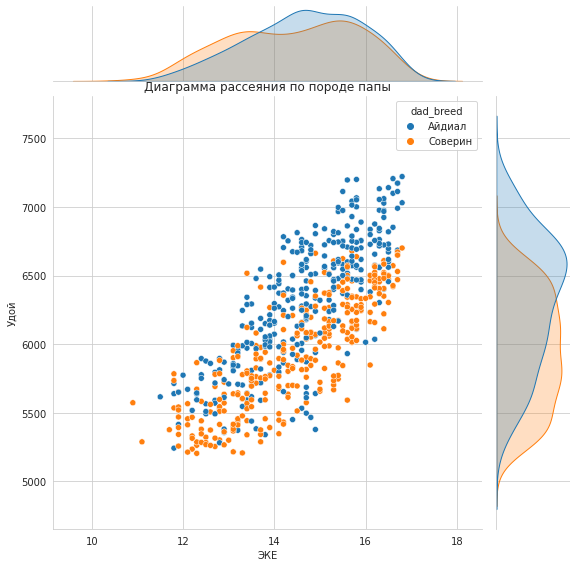

In [67]:
c = sns.jointplot(data=ferma, x='feed_unit', y='yield_kg', hue='dad_breed', height=8)
c.ax_joint.set_xlabel('ЭКЕ')
c.ax_joint.set_ylabel('Удой')
c.ax_joint.set_title('Диаграмма рассеяния по породе папы')
plt.show()

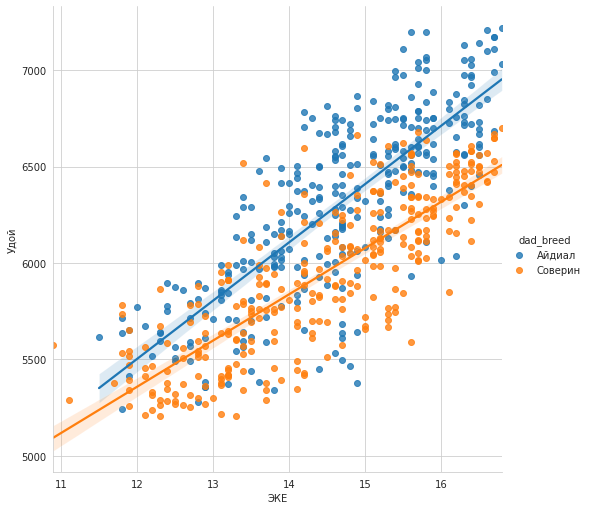

Корреляция Спирмена по признаку Айдиал равна 0.78
Корреляция по признаку Соверин равна 0.82
P-value меньше 5%


In [68]:
visual('feed_unit', 'dad_breed', 'ЭКЕ')

correlation('feed_unit', 'dad_breed', 'Айдиал', 'Соверин')

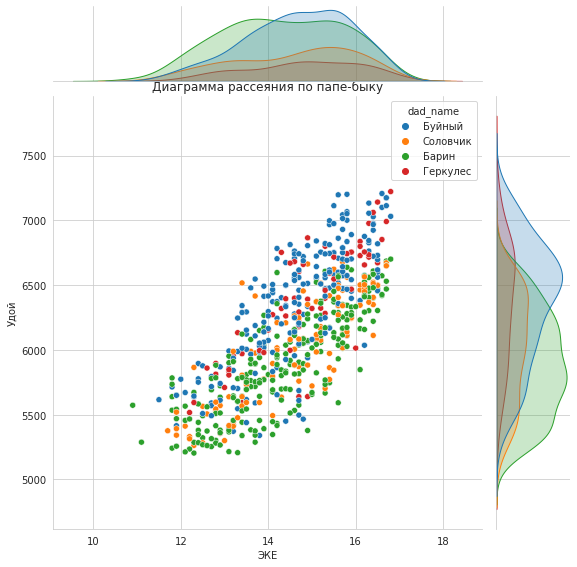

In [69]:
a = sns.jointplot(data=ferma, x='feed_unit', y='yield_kg', hue='dad_name', height=8)
a.ax_joint.set_xlabel('ЭКЕ')
a.ax_joint.set_ylabel('Удой')
a.ax_joint.set_title('Диаграмма рассеяния по папе-быку')
plt.show()

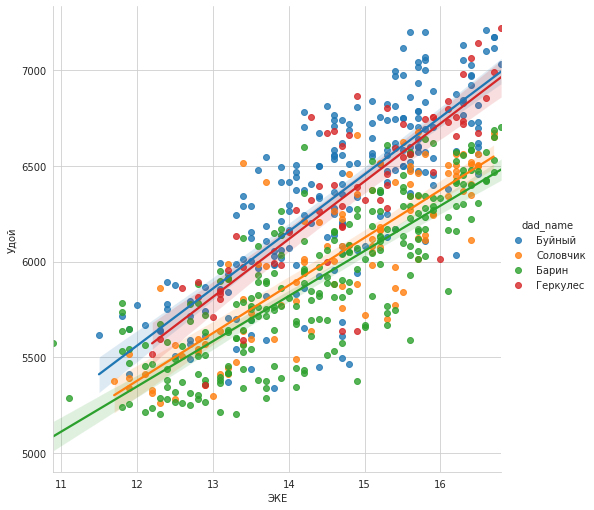

Корреляция по признаку Буйный равна 0.78
Корреляция Спирмена по признаку Соловчик равна 0.82
P-value меньше 5%
Корреляция Спирмена по признаку Геркулес равна 0.83
Корреляция Пирсона по признаку Барин равна 0.81
P-value меньше 5%


In [70]:
visual('feed_unit', 'dad_name', 'ЭКЕ')

correlation('feed_unit', 'dad_name', 'Буйный', 'Соловчик')
correlation('feed_unit', 'dad_name', 'Геркулес', 'Барин')

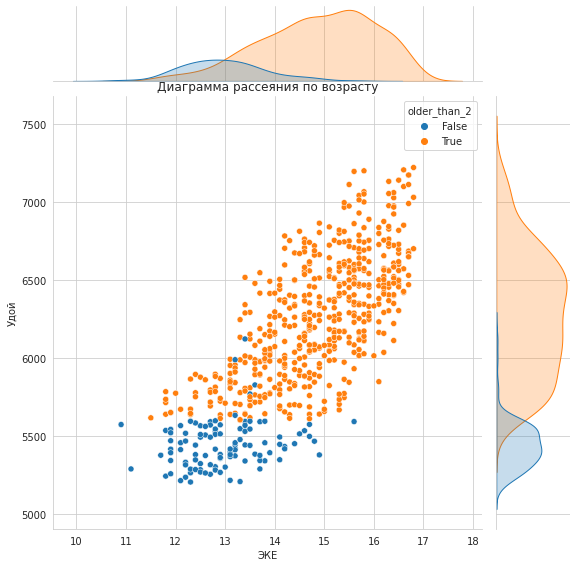

In [71]:
u = sns.jointplot(data=ferma, x='feed_unit', y='yield_kg', hue='older_than_2', height=8)
u.ax_joint.set_xlabel('ЭКЕ')
u.ax_joint.set_ylabel('Удой')
u.ax_joint.set_title('Диаграмма рассеяния по возрасту')
plt.show()

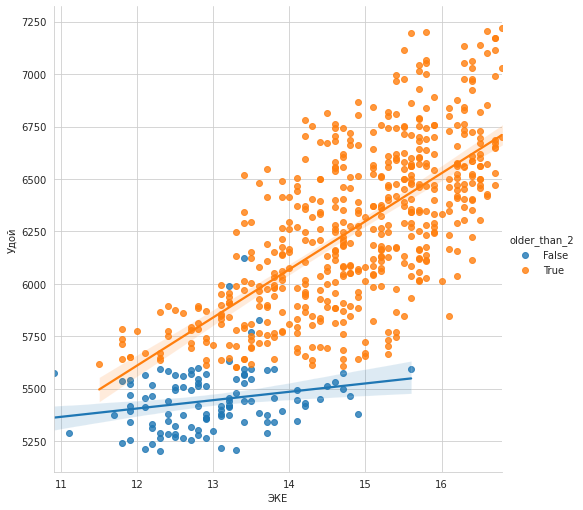

Корреляция по признаку True равна 0.67
Корреляция Пирсона по признаку False равна 0.22
P-value меньше 5%


In [72]:
visual('feed_unit', 'older_than_2', 'ЭКЕ')

correlation('feed_unit', 'older_than_2', True, False)

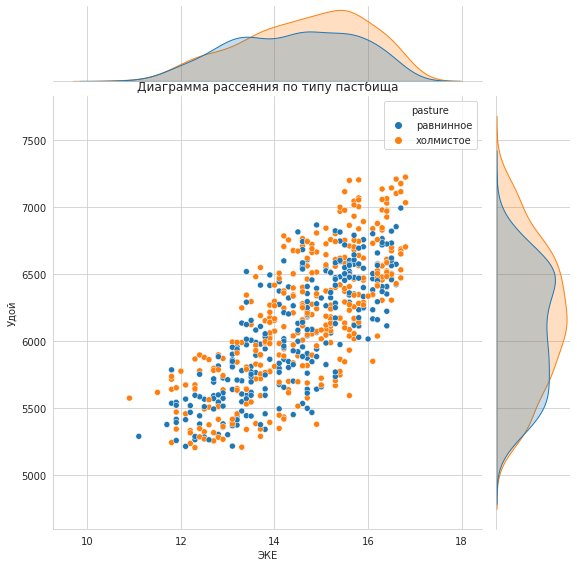

In [73]:
e = sns.jointplot(data=ferma, x='feed_unit', y='yield_kg', hue='pasture', height=8)
e.ax_joint.set_xlabel('ЭКЕ')
e.ax_joint.set_ylabel('Удой')
e.ax_joint.set_title('Диаграмма рассеяния по типу пастбища')
plt.show()

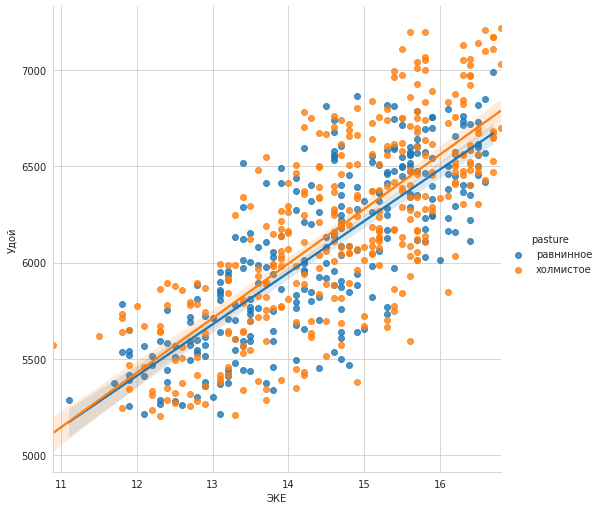

Корреляция по признаку равнинное равна 0.79
Корреляция по признаку холмистое равна 0.75
P-value меньше 5%


In [74]:
visual('feed_unit', 'pasture', 'ЭКЕ')

correlation('feed_unit', 'pasture', 'равнинное', 'холмистое')

### Удой и сырой протеин

In [75]:
def yield_crude_pr(hue, title):
    g = sns.jointplot(data=ferma, x='crude_protein_gr', y='yield_kg', hue=hue, height=8)
    g.ax_joint.set_xlabel('Сырой протеин, г')
    g.ax_joint.set_ylabel('Удой')
    g.ax_joint.set_title(title)
    plt.show()

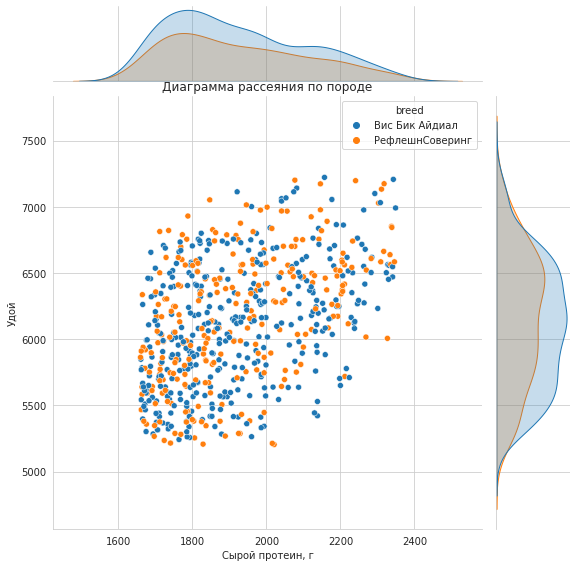

In [76]:
yield_crude_pr('breed', 'Диаграмма рассеяния по породе')

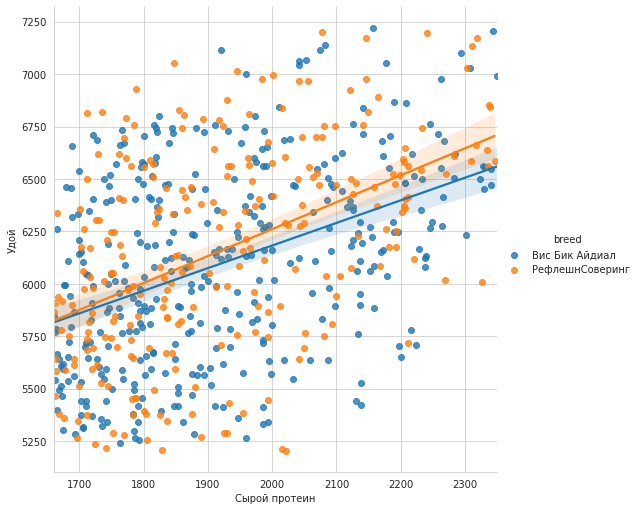

Корреляция Спирмена по признаку Вис Бик Айдиал равна 0.41
Корреляция по признаку РефлешнСоверинг равна 0.48
P-value меньше 5%


In [77]:
visual('crude_protein_gr', 'breed', 'Сырой протеин')

correlation('crude_protein_gr', 'breed', 'Вис Бик Айдиал', 'РефлешнСоверинг')

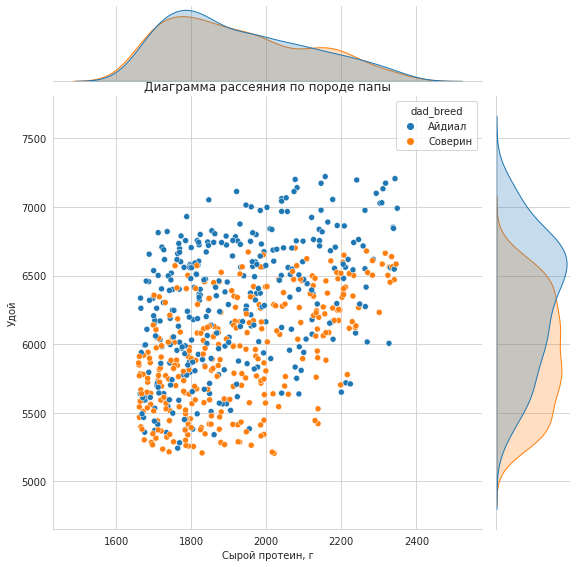

In [78]:
yield_crude_pr('dad_breed', 'Диаграмма рассеяния по породе папы')

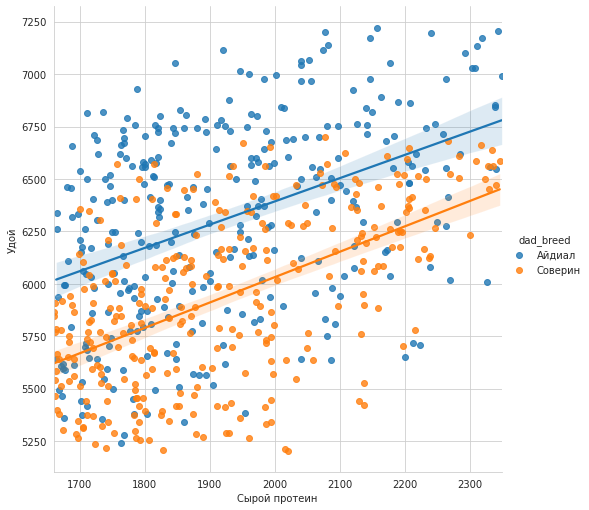

Корреляция по признаку Айдиал равна 0.43
Корреляция Спирмена по признаку Соверин равна 0.53
P-value меньше 5%


In [79]:
visual('crude_protein_gr', 'dad_breed', 'Сырой протеин')

correlation('crude_protein_gr', 'dad_breed', 'Айдиал', 'Соверин')

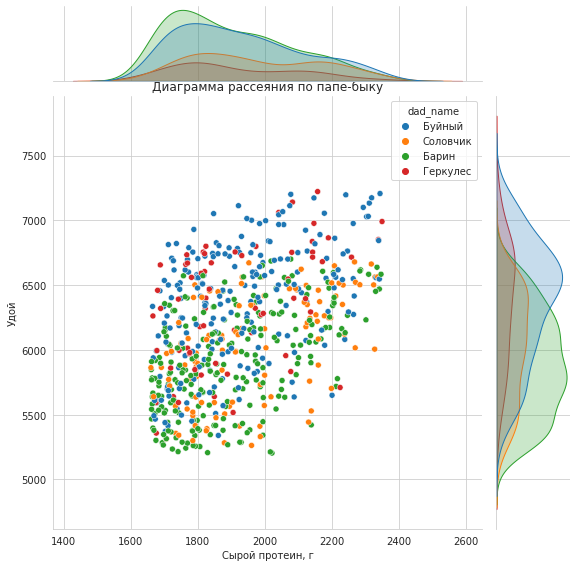

In [80]:
yield_crude_pr('dad_name', 'Диаграмма рассеяния по папе-быку')

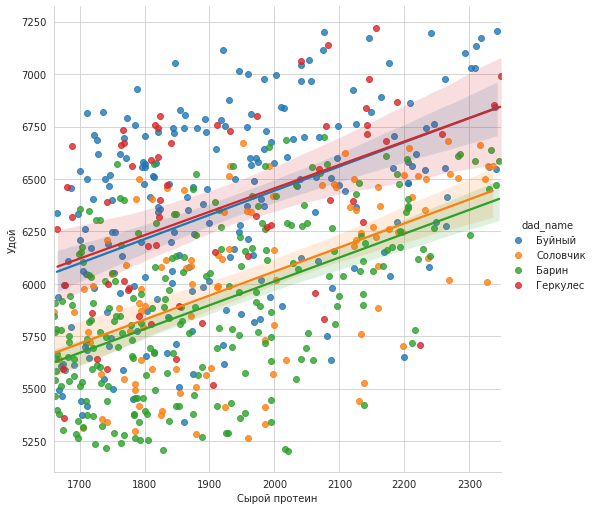

Корреляция по признаку Буйный равна 0.46
Корреляция Пирсона по признаку Соловчик равна 0.53
P-value меньше 5%
Корреляция Пирсона по признаку Геркулес равна 0.45
Корреляция Спирмена по признаку Барин равна 0.48
P-value меньше 5%


In [81]:
visual('crude_protein_gr', 'dad_name', 'Сырой протеин')

correlation('crude_protein_gr', 'dad_name', 'Буйный', 'Соловчик')
correlation('crude_protein_gr', 'dad_name', 'Геркулес', 'Барин')

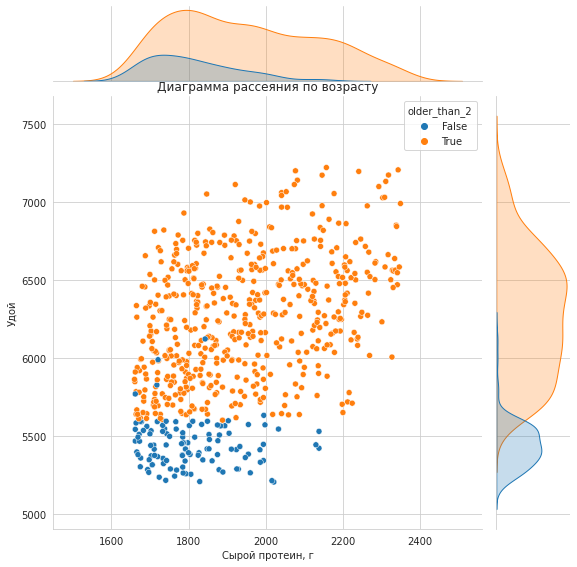

In [82]:
yield_crude_pr('older_than_2', 'Диаграмма рассеяния по возрасту')

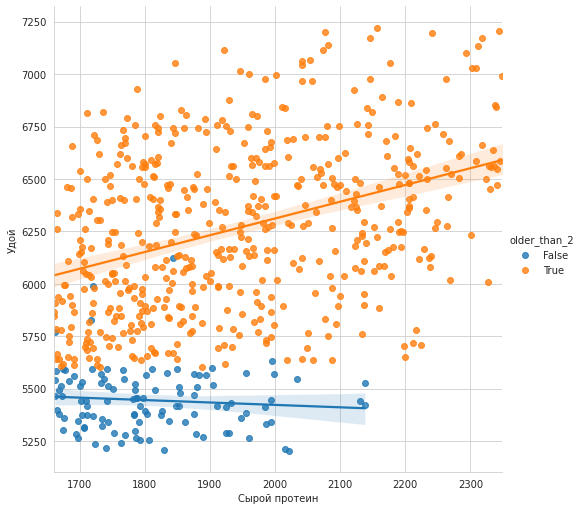

Корреляция Спирмена по признаку True равна 0.37
Корреляция по признаку False равна -0.09
P-value по Пирсону по признаку False равен: 0.35769985680747596


In [83]:
visual('crude_protein_gr', 'older_than_2', 'Сырой протеин')

correlation('crude_protein_gr', 'older_than_2', True, False)

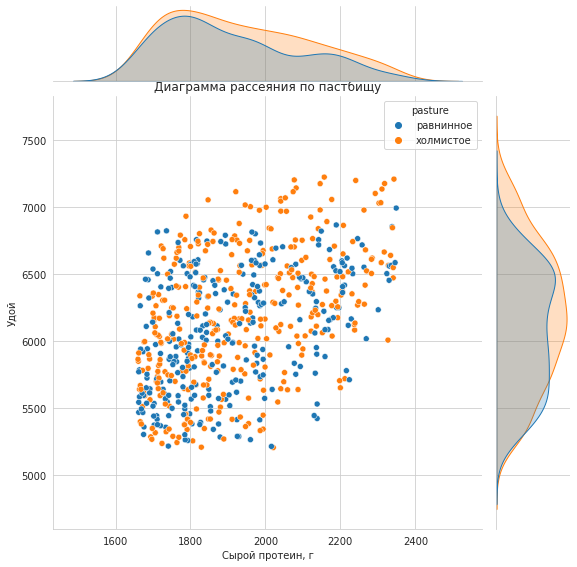

In [84]:
yield_crude_pr('pasture', 'Диаграмма рассеяния по пастбищу')

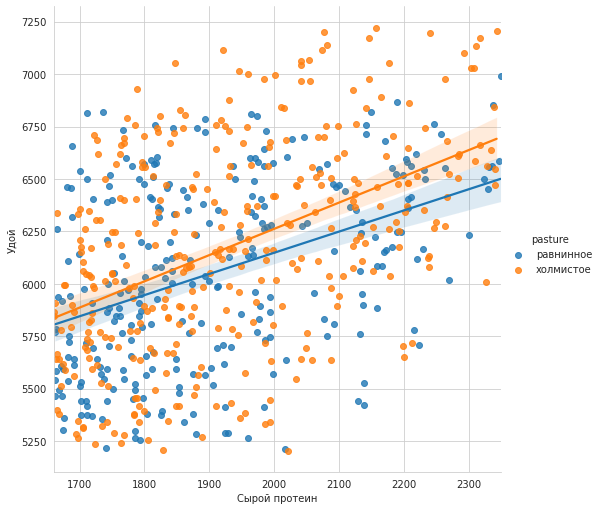

Корреляция Спирмена по признаку равнинное равна 0.4
Корреляция Спирмена по признаку холмистое равна 0.46
P-value меньше 5%


In [85]:
visual('crude_protein_gr', 'pasture', 'Сырой протеин')

correlation('crude_protein_gr', 'pasture', 'равнинное', 'холмистое')

### Удой и СПО

In [86]:
def yield_sug_pr(hue, title):
    k = sns.jointplot(data=ferma, x='sugar_protein_proportion', y='yield_kg', hue=hue, height=8)
    k.ax_joint.set_xlabel('СПО')
    k.ax_joint.set_ylabel('Удой')
    k.ax_joint.set_title(title)
    plt.show()

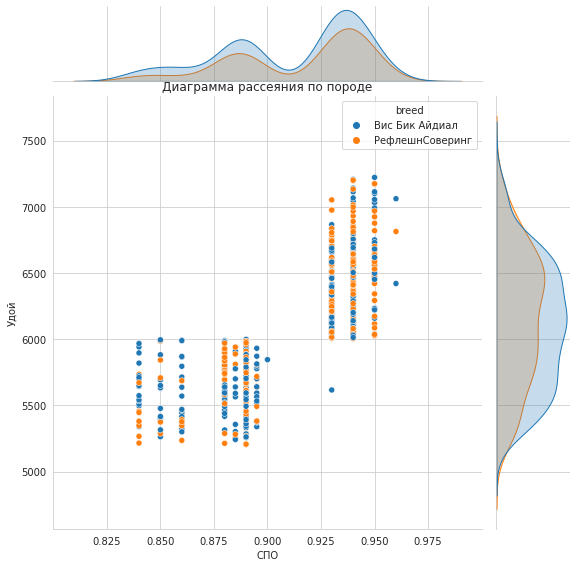

In [87]:
yield_sug_pr('breed', 'Диаграмма рассеяния по породе')

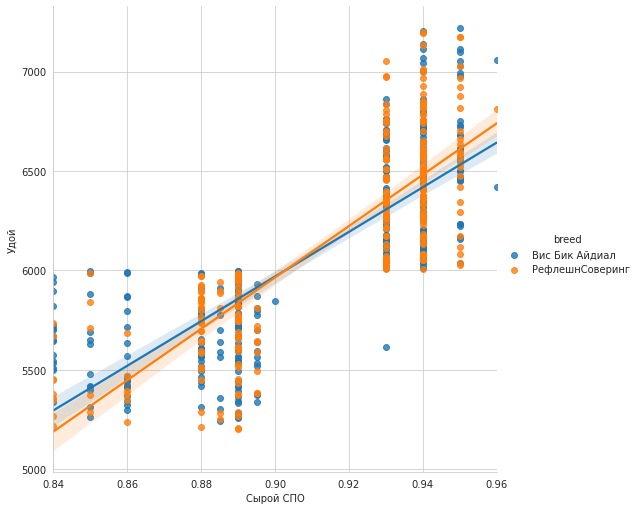

Корреляция Спирмена по признаку Вис Бик Айдиал равна 0.79
Корреляция Спирмена по признаку РефлешнСоверинг равна 0.77
P-value меньше 5%


In [88]:
visual('sugar_protein_proportion', 'breed', 'Сырой СПО')

correlation('sugar_protein_proportion', 'breed', 'Вис Бик Айдиал', 'РефлешнСоверинг')

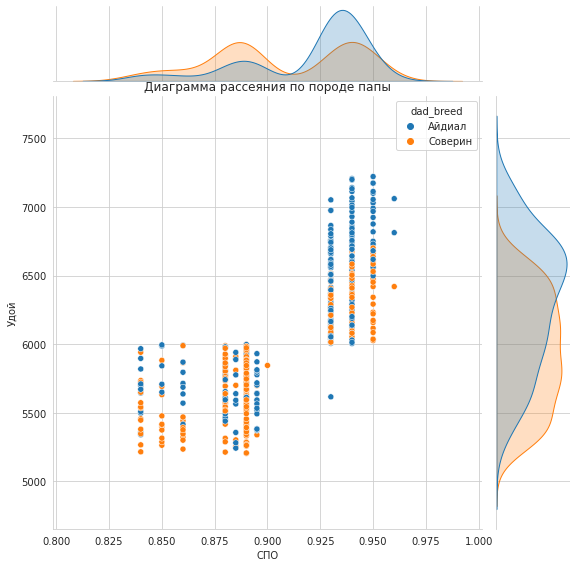

In [89]:
yield_sug_pr('dad_breed', 'Диаграмма рассеяния по породе папы')

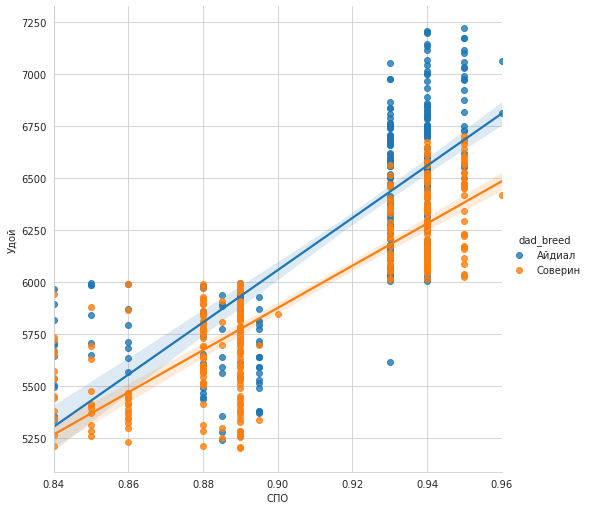

Корреляция Спирмена по признаку Айдиал равна 0.76
Корреляция Спирмена по признаку Соверин равна 0.82
P-value меньше 5%


In [90]:
visual('sugar_protein_proportion', 'dad_breed', 'СПО')

correlation('sugar_protein_proportion', 'dad_breed', 'Айдиал', 'Соверин')

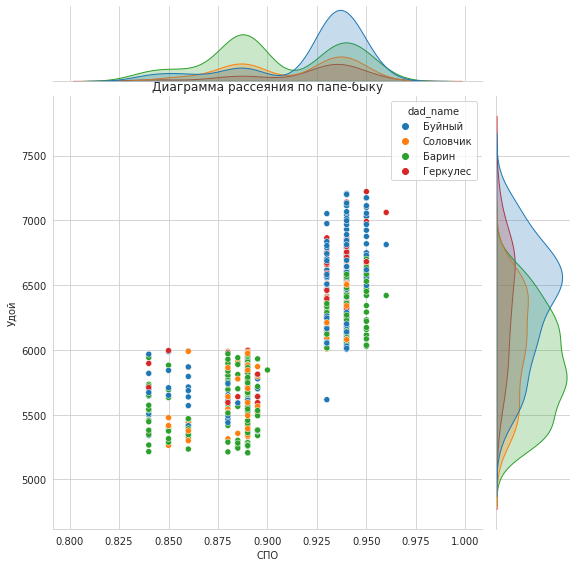

In [91]:
yield_sug_pr('dad_name', 'Диаграмма рассеяния по папе-быку')

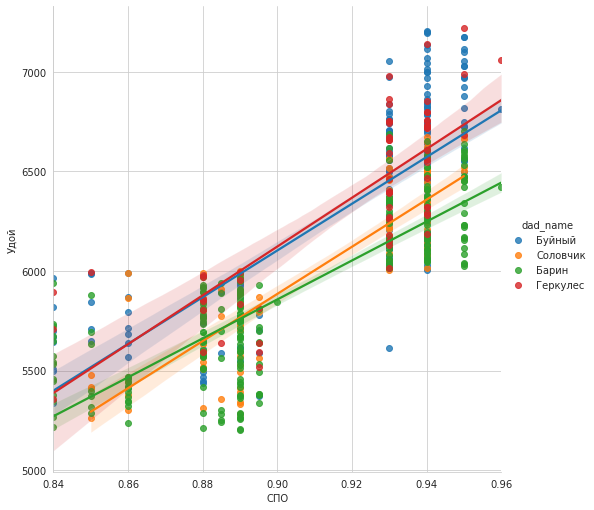

Корреляция между значением Буйный по Пирсону равно 0.77, по Спирмену равно 0.71
Корреляция Спирмена по признаку Соловчик равна 0.82
P-value меньше 5%
Корреляция Спирмена по признаку Геркулес равна 0.75
Корреляция Спирмена по признаку Барин равна 0.79
P-value меньше 5%


In [92]:
visual('sugar_protein_proportion', 'dad_name', 'СПО')

correlation('sugar_protein_proportion', 'dad_name', 'Буйный', 'Соловчик')
correlation('sugar_protein_proportion', 'dad_name', 'Геркулес', 'Барин')

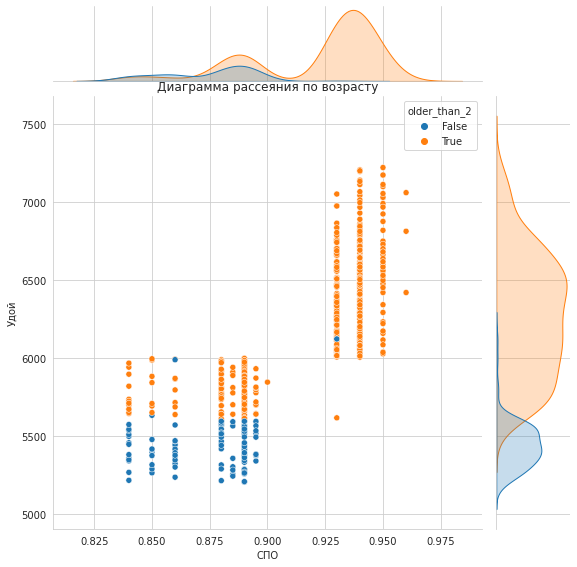

In [93]:
yield_sug_pr('older_than_2', 'Диаграмма рассеяния по возрасту')

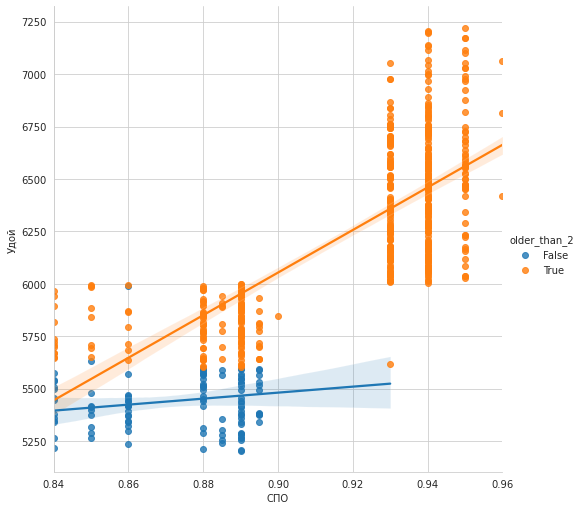

Корреляция Спирмена по признаку True равна 0.7
Корреляция между значением False по Пирсону равно 0.19, по Спирмену равно 0.09
P-value по Пирсону по признаку False равен: 0.050535179796432156


In [94]:
visual('sugar_protein_proportion', 'older_than_2', 'СПО')

correlation('sugar_protein_proportion', 'older_than_2', True, False)

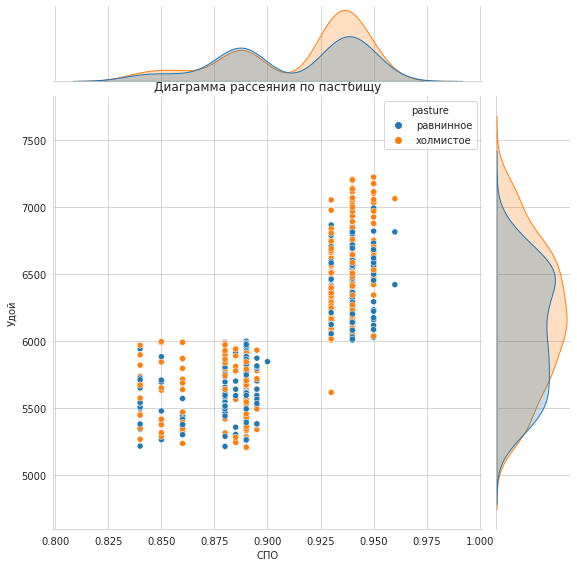

In [95]:
yield_sug_pr('pasture', 'Диаграмма рассеяния по пастбищу')

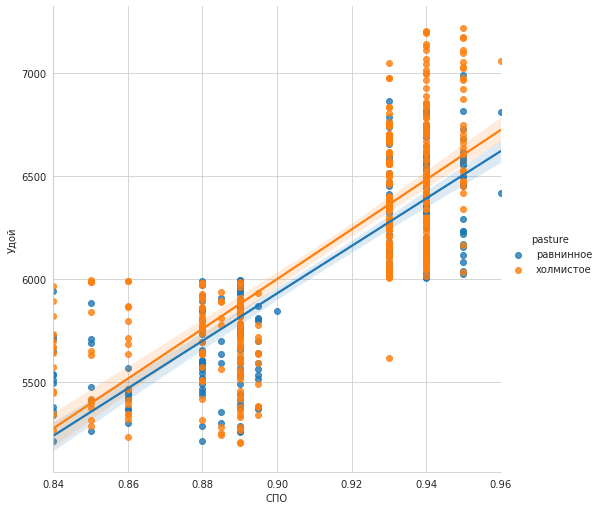

Корреляция Спирмена по признаку равнинное равна 0.81
Корреляция Спирмена по признаку холмистое равна 0.77
P-value меньше 5%


In [96]:
visual('sugar_protein_proportion', 'pasture', 'СПО')

correlation('sugar_protein_proportion', 'pasture', 'равнинное', 'холмистое')

### Удой и жирность молока

In [97]:
def yield_fat(hue, title):
    m = sns.jointplot(data=ferma, x='milk_fat', y='yield_kg', hue=hue, height=8)
    m.ax_joint.set_xlabel('Жирность молока')
    m.ax_joint.set_ylabel('Удой')
    m.ax_joint.set_title(title)
    plt.show()

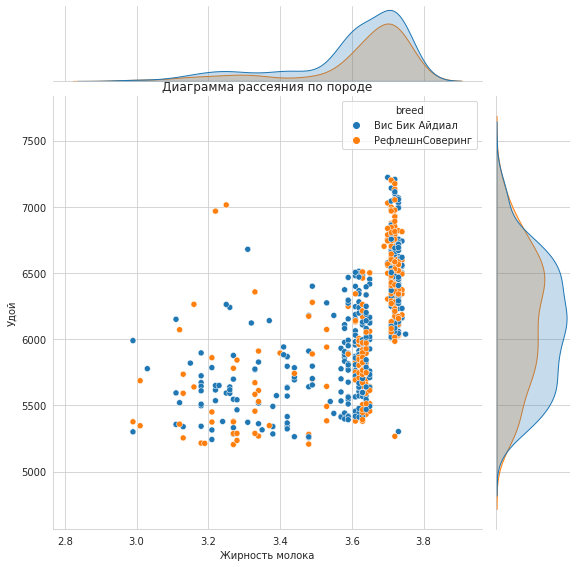

In [98]:
yield_fat('breed', 'Диаграмма рассеяния по породе')

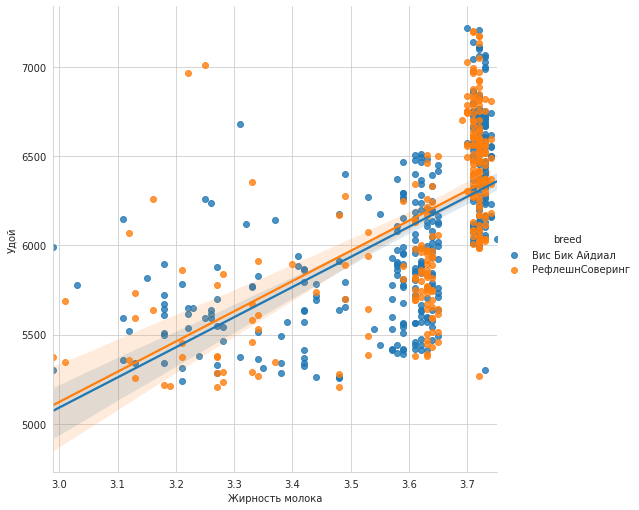

Корреляция между значением Вис Бик Айдиал по Пирсону равно 0.61, по Спирмену равно 0.71
Корреляция между значением РефлешнСоверинг по Пирсону равно 0.58, по Спирмену равно 0.64
P-value меньше 5%


In [99]:
visual('milk_fat', 'breed', 'Жирность молока')

correlation('milk_fat', 'breed', 'Вис Бик Айдиал', 'РефлешнСоверинг')

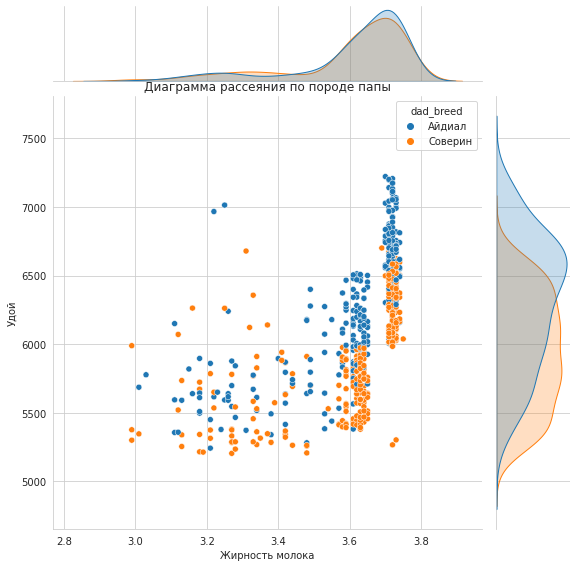

In [100]:
yield_fat('dad_breed', 'Диаграмма рассеяния по породе папы')

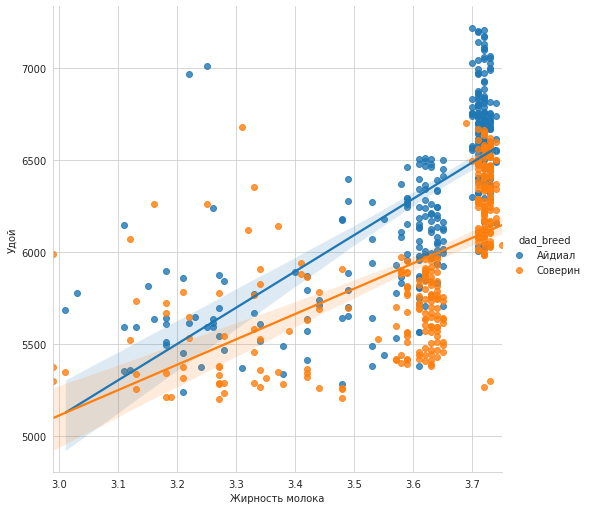

Корреляция Пирсона по признаку Айдиал равна 0.69
Корреляция между значением Соверин по Пирсону равно 0.59, по Спирмену равно 0.73
P-value меньше 5%


In [101]:
visual('milk_fat', 'dad_breed', 'Жирность молока')

correlation('milk_fat', 'dad_breed', 'Айдиал', 'Соверин')

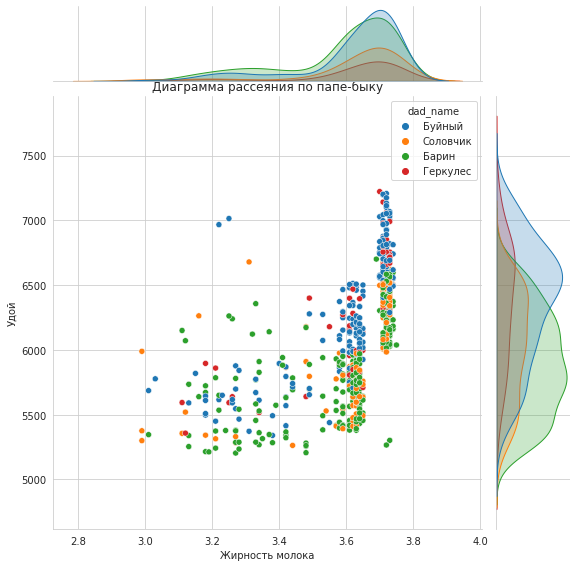

In [102]:
yield_fat('dad_name', 'Диаграмма рассеяния по папе-быку')

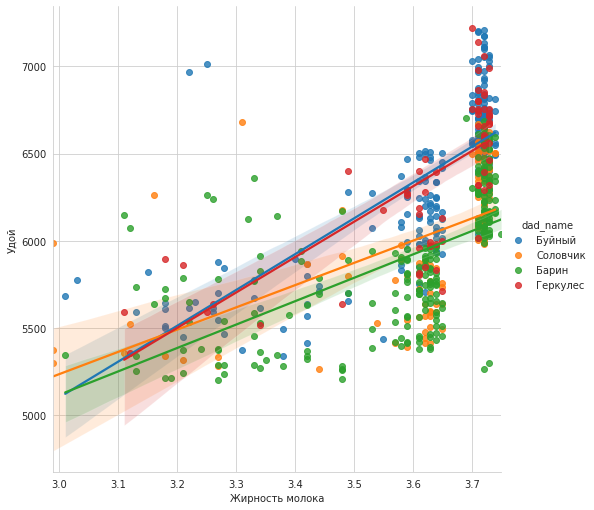

Корреляция Пирсона по признаку Буйный равна 0.72
Корреляция между значением Соловчик по Пирсону равно 0.55, по Спирмену равно 0.71
P-value меньше 5%
Корреляция Спирмена по признаку Геркулес равна 0.71
Корреляция между значением Барин по Пирсону равно 0.58, по Спирмену равно 0.71
P-value меньше 5%


In [103]:
visual('milk_fat', 'dad_name', 'Жирность молока')

correlation('milk_fat', 'dad_name', 'Буйный', 'Соловчик')
correlation('milk_fat', 'dad_name', 'Геркулес', 'Барин')

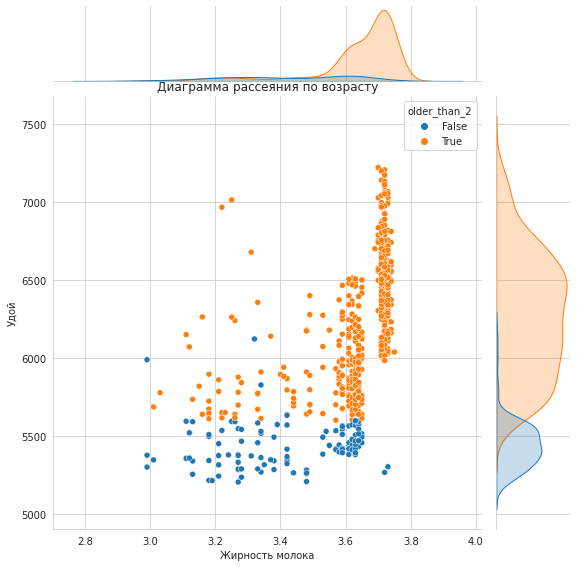

In [104]:
yield_fat('older_than_2', 'Диаграмма рассеяния по возрасту')

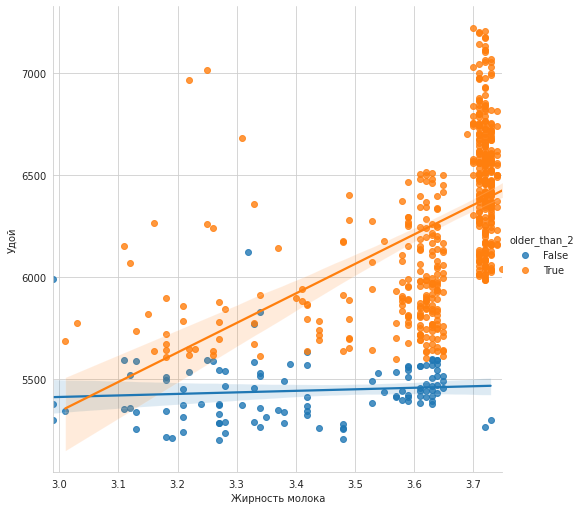

Корреляция между значением True по Пирсону равно 0.5, по Спирмену равно 0.59
Корреляция между значением False по Пирсону равно 0.1, по Спирмену равно 0.24
P-value по Пирсону по признаку False равен: 0.3065914418102696


In [105]:
visual('milk_fat', 'older_than_2', 'Жирность молока')

correlation('milk_fat', 'older_than_2', True, False)

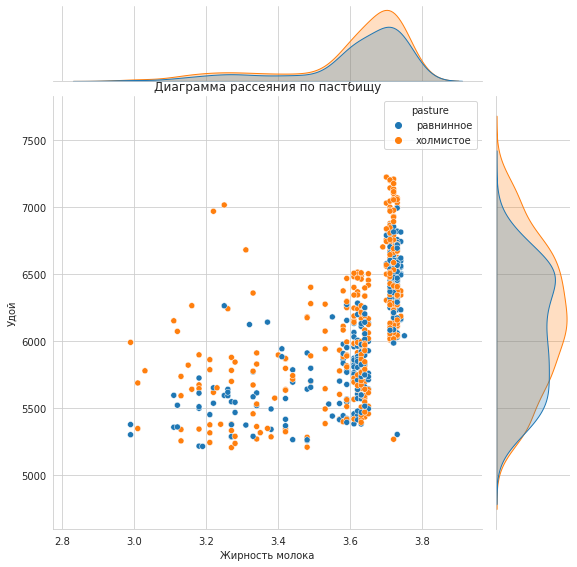

In [106]:
yield_fat('pasture', 'Диаграмма рассеяния по пастбищу')

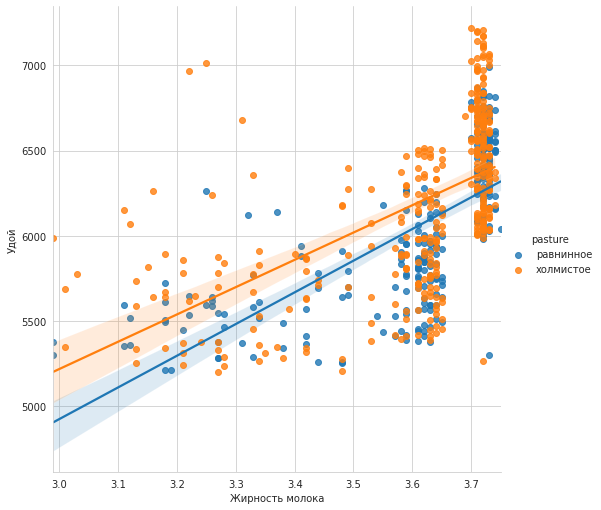

Корреляция между значением равнинное по Пирсону равно 0.69, по Спирмену равно 0.78
Корреляция между значением холмистое по Пирсону равно 0.56, по Спирмену равно 0.63
P-value меньше 5%


In [107]:
visual('milk_fat', 'pasture', 'Жирность молока')

correlation('milk_fat', 'pasture', 'равнинное', 'холмистое')

### Удой и содержание белка в молоке

In [108]:
def yield_protein(hue, title):
    n = sns.jointplot(data=ferma, x='milk_protein', y='yield_kg', hue=hue, height=8)
    n.ax_joint.set_xlabel('Белок в молоке')
    n.ax_joint.set_ylabel('Удой')
    n.ax_joint.set_title(title)
    plt.show()

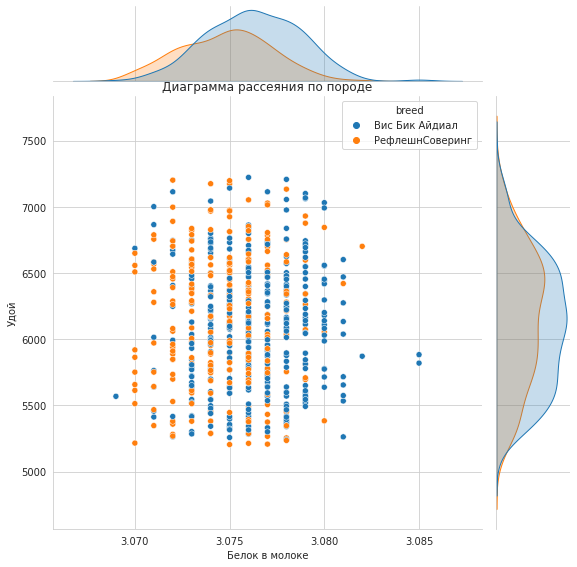

In [109]:
yield_protein('breed', 'Диаграмма рассеяния по породе')

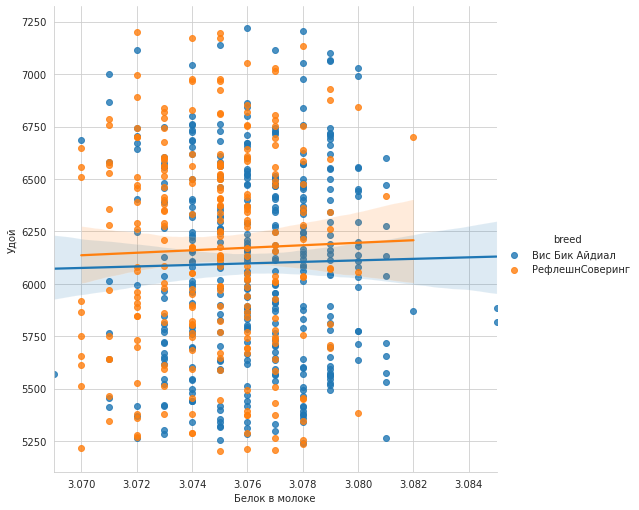

Корреляция по признаку Вис Бик Айдиал равна 0.02
Корреляция Спирмена по признаку РефлешнСоверинг равна 0.01
P-value по Пирсону по признаку Вис Бик Айдиал равен: 0.7097514912058774


In [110]:
visual('milk_protein', 'breed', 'Белок в молоке')

correlation('milk_protein', 'breed', 'Вис Бик Айдиал', 'РефлешнСоверинг')

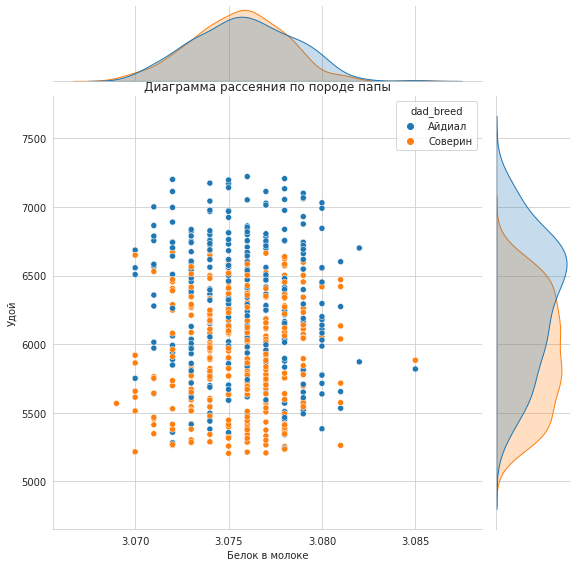

In [111]:
yield_protein('dad_breed', 'Диаграмма рассеяния по породе папы')

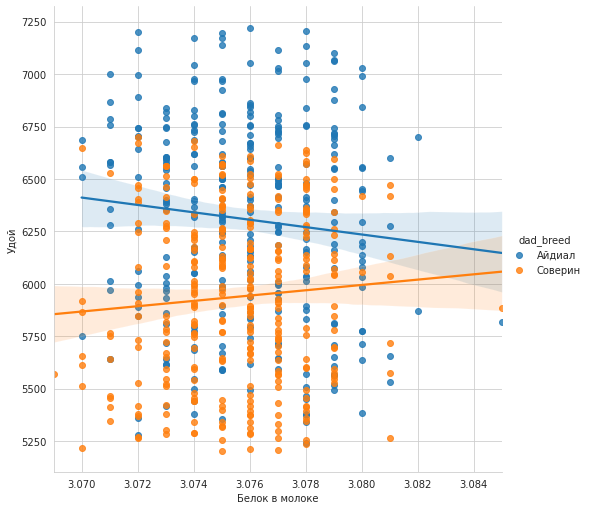

Корреляция по признаку Айдиал равна -0.1
Корреляция Спирмена по признаку Соверин равна 0.06
P-value по Пирсону по признаку Айдиал равен: 0.0779549609375563


In [112]:
visual('milk_protein', 'dad_breed', 'Белок в молоке')

correlation('milk_protein', 'dad_breed', 'Айдиал', 'Соверин')

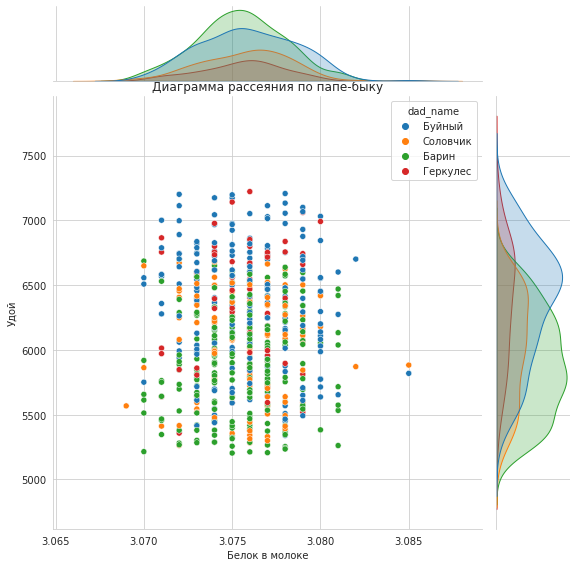

In [113]:
yield_protein('dad_name', 'Диаграмма рассеяния по папе-быку')

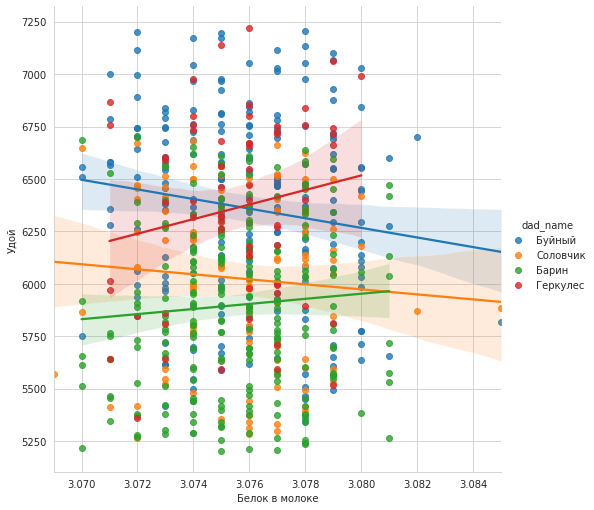

Корреляция по признаку Буйный равна -0.14
Корреляция Пирсона по признаку Соловчик равна -0.08
P-value по Пирсону по признаку Соловчик равен: 0.43172688352833527
Корреляция между значением Геркулес по Пирсону равно 0.18, по Спирмену равно 0.12
Корреляция по признаку Барин равна 0.07
P-value по Пирсону по признаку Геркулес равен: 0.164449664532891


In [114]:
visual('milk_protein', 'dad_name', 'Белок в молоке')

correlation('milk_protein', 'dad_name', 'Буйный', 'Соловчик')
correlation('milk_protein', 'dad_name', 'Геркулес', 'Барин')

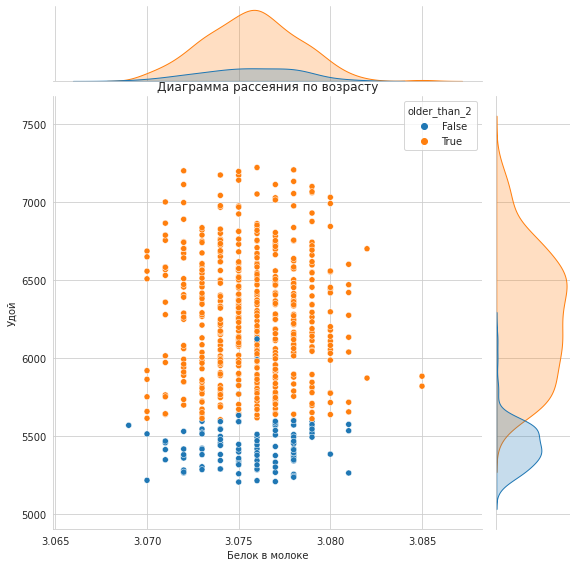

In [115]:
yield_protein('older_than_2', 'Диаграмма рассеяния по возрасту')

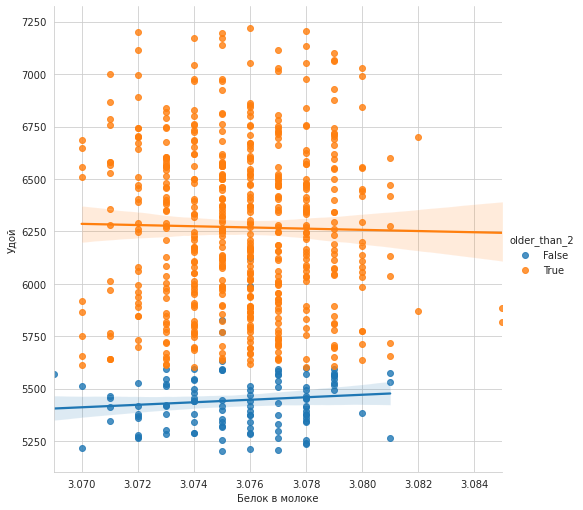

Корреляция по признаку True равна -0.02
Корреляция Пирсона по признаку False равна 0.1
P-value по Пирсону по признаку True равен: 0.6705280537991651


In [116]:
visual('milk_protein', 'older_than_2', 'Белок в молоке')

correlation('milk_protein', 'older_than_2', True, False)

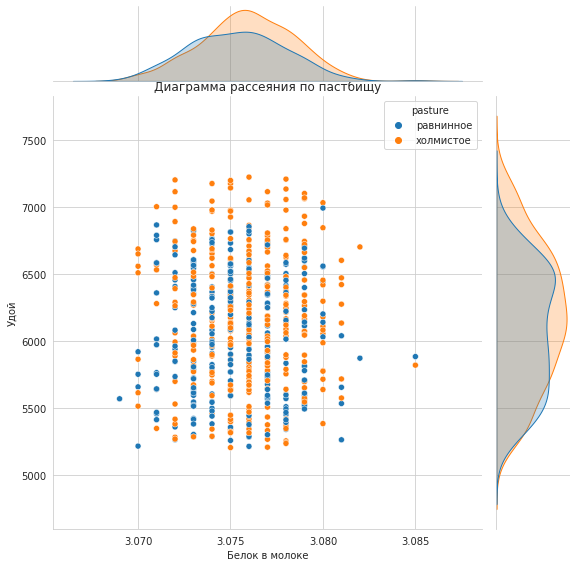

In [117]:
yield_protein('pasture', 'Диаграмма рассеяния по пастбищу')

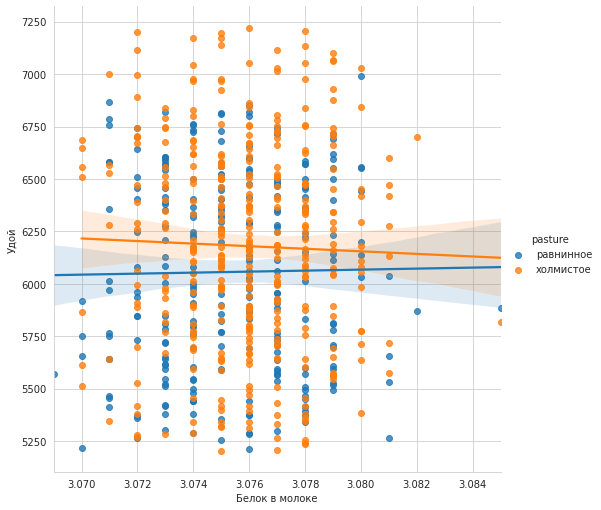

Корреляция по признаку равнинное равна 0.01
Корреляция по признаку холмистое равна -0.03
P-value по Пирсону по признаку равнинное равен: 0.8160074052891025


In [118]:
visual('milk_protein', 'pasture', 'Белок в молоке')

correlation('milk_protein', 'pasture', 'равнинное', 'холмистое')

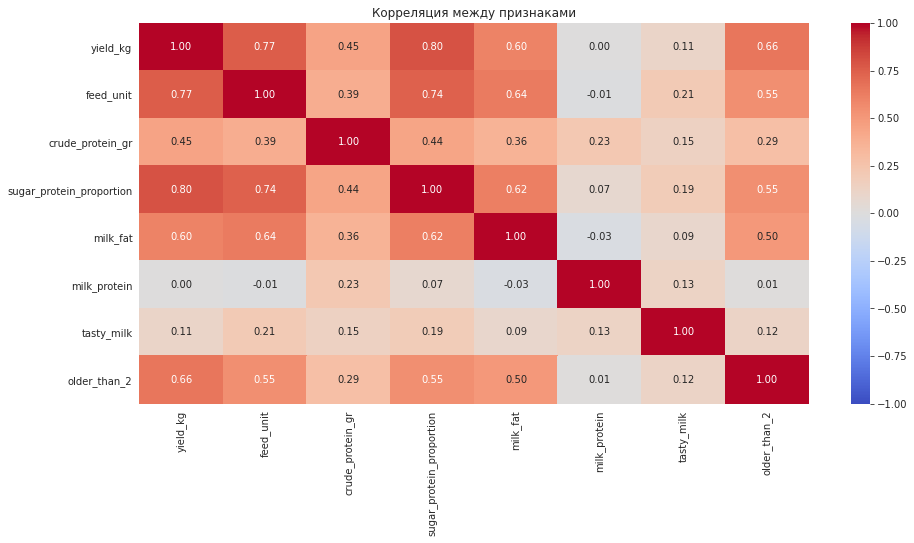

In [119]:
plt.figure(figsize=(15,7))
sns.heatmap(ferma.drop('id', axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1,  fmt='.2f')
plt.title('Корреляция между признаками')
plt.show()

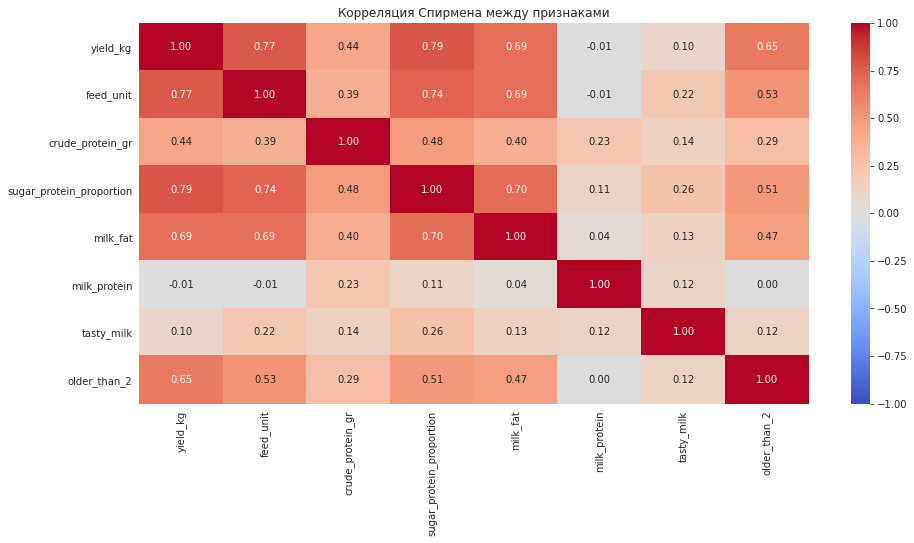

In [120]:
plt.figure(figsize=(15,7))
sns.heatmap(ferma.drop('id', axis=1).corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1,  fmt='.2f')
plt.title('Корреляция Спирмена между признаками')
plt.show()

In [121]:
#расчет мультиколлинеарности
vif = ferma.drop(['id','yield_kg', 'pasture', 'breed', 'dad_breed', 'dad_name', 'tasty_milk', 'older_than_2'], axis=1)

vif_c = add_constant(vif.drop('feed_unit', axis=1))

vif_data = pd.DataFrame()
vif_data['variable'] = vif_c.columns
vif_data['vif'] = [variance_inflation_factor(vif_c.values, i) for i in range(vif_c.shape[1])]
vif_data

variable           vif
0                     const  1.560111e+06
1          crude_protein_gr  1.334775e+00
2  sugar_protein_proportion  1.805760e+00
3                  milk_fat  1.688331e+00
4              milk_protein  1.071170e+00

**Выводы:**
- Какой тип взаимосвязи между целевым и входными признаками?
    - Матрица диаграмм рассеяния указывает на возможное наличие среди числовых и бинарных значений положительной линейной связи между удоем и ЭКЕ, СПО (хотя, возможно, у обоих признаков связь нелинейная, несмотря на значение корреляции), жирностью молока и возрастом коровы. 
    - На значение коэффициента корреляции Пирсона в сравнении с коэффициентом Спирмена значительно повлияли выбросы и распределение только у входного признака Жирность молока. 
    - С учетом категориальных признаков подтверждается линейная зависимость между удоем и ЭКЕ, СПО, жирностью молока.
    - Зависимость между удоем и сырым протеином средняя.
    - Между признаками удой и содержание белка практически нет корреляции.

- Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
    - Возможна нелинейная связь между удоем и ЭКЕ, а именно параболическая зависимость. Для ее устарнения можно будет возвести данные в квадрат. 
    - Также нелинейная связь может быть у удоя с входным признаком СПО, так как на графике видны две группы скоплений точек, чтобы учесть такую зависимость можно сделать товар категориальным. 

- Наблюдается ли мультиколлинеарность между входными признаками?
    - Ярко выраженной мультиколлинеарности, которая могла бы повлиять на результат модели, между числовыми признаками не наблюдается.

<a id='six'></a>
## Обучение модели линейной регрессии

### Модель 1

Определим, какие входные призаки оставим для линейной регрессии: 
- id не является признаком для коровы, а только ее числовым обозначением, поэтому нет необходимости включать его в модель
- в модель включим все признаки, которые относятся к корму, поскольку питание напрямую влияет на производство молока, по той же причине включим и значение тип пастбища. 
- в модель не будем включать характеристики, которые относятя к молоку, то есть вкус, жирность и белки. Хотя коэффициент корреляции и показал наличие связи, она может быть обусловлена зависимостью от корма. Молоко большинства коров составлят 3.6-3.7%, но присутствует множество выбросов меньших значений. Так, корреляция может быть основана на следующем принципе: чем лучше питание коровы, тем больше дает она молока и тем более жирным оно является.
- В модель также включим и все признаки, относящиеся к коровам. Возраст и порода влияют на удойность коровы. Также может влиять и определенное сочетание генов при скрещивании разных линий пород, то есть включим и значение породы папы-быка. Значение имени папы-быка включим в модели позднее, чтобы рассмотреть влияние конкретного быка, а не только его породы. 

In [122]:
#сохраняем входные и целевой признак
X = ferma.drop(['yield_kg', 'id', 'milk_fat', 'milk_protein', 'dad_name', 'tasty_milk'], axis=1)
y = ferma['yield_kg']

In [123]:
#создание константы random_state
RANDOM_STATE = 42

#сохранение выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [124]:
#подготовка входных признаков

#кодирование категориальных признаков
cat = ['pasture', 'breed', 'dad_breed', 'older_than_2']

encoder1 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder1.fit_transform(X_train[cat])
X_test_ohe = encoder1.transform(X_test[cat])

encoder1_names = encoder1.get_feature_names()


#масштабирование
num = ['feed_unit', 'crude_protein_gr', 'sugar_protein_proportion']

scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train[num])
X_test_scaled = scaler1.transform(X_test[num])

#объединение в датафрейм
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder1_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder1_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [125]:
#обучение линейной модели
model_lr1 = LinearRegression()
model_lr1.fit(X_train, y_train)

#предсказание
predictions = model_lr1.predict(X_test)

In [126]:
def metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f'R² модели равен {r2.round(2)}')
    print(f'MSE модели равен {mse.round(2)}')
    print(f'RMSE модели равен {rmse.round(2)}')
    print(f'MAE модели равен {mae.round(2)}')

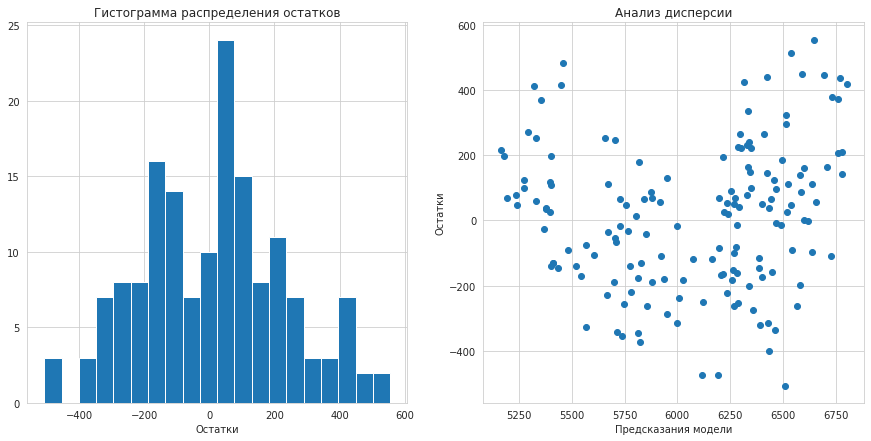

R² модели равен 0.82
MSE модели равен 49470.6
RMSE модели равен 222.42
MAE модели равен 180.8


In [127]:
#оценка качества - построение графиков остатков
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].hist(residuals, bins=20)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

metrics(y_test, predictions)

**Вывод:**
1. Коэффициент детерминации R² равен 0.82
2. Распределение остатков:
- самое частое значение распределенных остатков находится правее 0, то есть модель не совсем точно предсказывает целевой признак;
- график не совсем симметричен, так как есть провал и небольшой пик у отрицательных значений рядом с 0;
- распределение остатков на графике в виде дуги, то есть нелинейно, дисперсия больше на больших значениях удоя.
3. Необходимо дальнейшее изменение данных: поскольку остатки распределены нелинейно, изменим данные, в которых ранее предполагалась нелинейность - ЭКЕ и СПО. Также на нестабильность модели могла повлиять существующая в некоторой степени мультиколлинеарность между СПО и ЭКЕ.

### Модель 2

In [128]:
#возведем в квадрат значения ЭКЕ, чтобы избавиться от нелинейности
ferma['feed_unit2'] = ferma['feed_unit'].apply(lambda x: x**2)

In [129]:
#замена типа данных СПО на категориальный
ferma['spp'] = ferma['sugar_protein_proportion'].apply(lambda x: 'more_0.91' if x > 0.91 else 'less_0.91')

In [130]:
#сохраняем входные и целевой признак
X = ferma.drop(['id', 'feed_unit', 'sugar_protein_proportion', 'tasty_milk', 'dad_name', 'yield_kg', 'milk_fat', 'milk_protein'], axis=1)
y = ferma['yield_kg']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [132]:
#кодирование категориальных признаков
cat = ['pasture', 'breed', 'dad_breed', 'older_than_2', 'spp']

encoder2 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder2.fit_transform(X_train[cat])
X_test_ohe = encoder2.transform(X_test[cat])

encoder2_names = encoder2.get_feature_names()

#масштабирование
num = ['feed_unit2', 'crude_protein_gr']

scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train[num])
X_test_scaled = scaler2.transform(X_test[num])

#объединение в датафрейм
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder2_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder2_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [133]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)
predictions = model_lr2.predict(X_test)

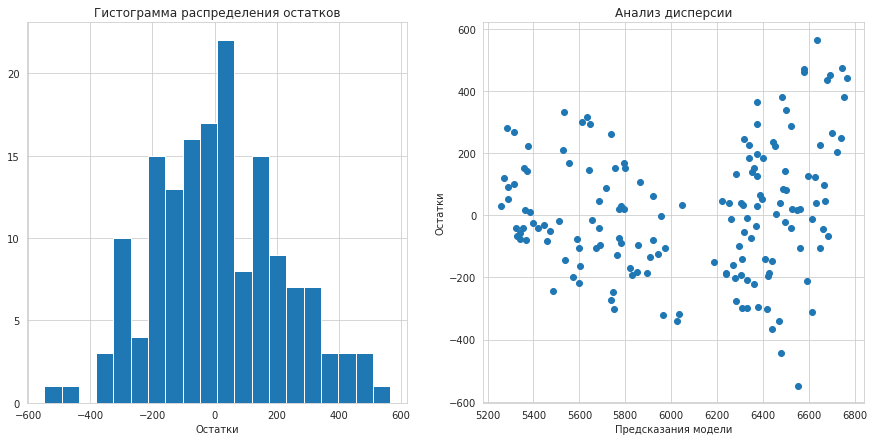

R² модели равен 0.84
MSE модели равен 42729.68
RMSE модели равен 206.71
MAE модели равен 164.12


In [134]:
#оценка качества - построение графиков остатков
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].hist(residuals, bins=20)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

metrics(y_test, predictions)

**Вывод:**
1. Коэффициент детерминации стал ближе к 1, его значение равно 0.84
2. Распределение остатков стало более приближенным к нормальному, при этом есть небольшое смещение наиболее частотного значения вправо
3. Дисперсия по прежнему больше на больших значениях удоя, сохраняется большой разброс между остатками в правой части графика.

Для улучшения модели добавим новый признак.

### Модель 3

In [135]:
#добавим новый признак в модель
#сохраняем входные и целевой признак
X = ferma.drop(['id', 'feed_unit', 'sugar_protein_proportion', 'tasty_milk', 'yield_kg', 'milk_fat', 'milk_protein'], axis=1)
y = ferma['yield_kg']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [137]:
#кодирование категориальных признаков
cat = ['pasture', 'breed', 'dad_breed', 'older_than_2', 'spp', 'dad_name']

encoder3 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder3.fit_transform(X_train[cat])
X_test_ohe = encoder3.transform(X_test[cat])

encoder3_names = encoder3.get_feature_names()

#числовые данные с прошлой модели не изменились, можем использовать прежний результат
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder3_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder3_names)

#объединение в датафрейм
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [138]:
model_lr3 = LinearRegression()
model_lr3.fit(X_train, y_train)
predictions = model_lr3.predict(X_test)

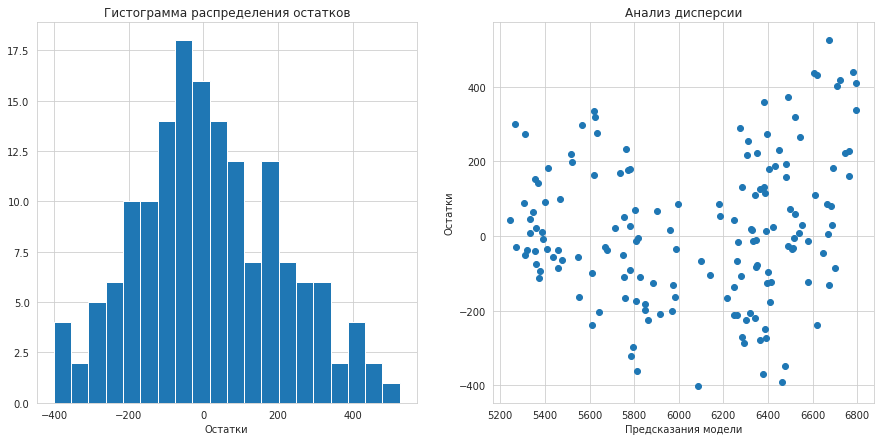

R² модели равен 0.86
MSE модели равен 37613.18
RMSE модели равен 193.94
MAE модели равен 153.51


In [139]:
#оценка качества - построение графиков остатков
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].hist(residuals, bins=20)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

metrics(y_test, predictions)

**Выводы:**
1. Коэффициент детерминации стал ближе к 1, его значение равно 0.86
2. Остатки распределены нормально, наиболее частотное значение немного смещено влево.
3. Дисперсия распределена более равномерно 

### Модель 4

Добавим в модель признаки, которые в самом начале построения модели мы отмели в связи с отсутствием выраженной корреляции. 

In [140]:
X = ferma.drop(['id', 'feed_unit', 'sugar_protein_proportion', 'tasty_milk', 'yield_kg'], axis=1)
y = ferma['yield_kg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)


#масштабирование
num = ['feed_unit2', 'crude_protein_gr', 'milk_fat', 'milk_protein']

scaler3 = StandardScaler()
X_train_scaled = scaler3.fit_transform(X_train[num])
X_test_scaled = scaler3.transform(X_test[num])

#объединение в датафрейм
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder3_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder3_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

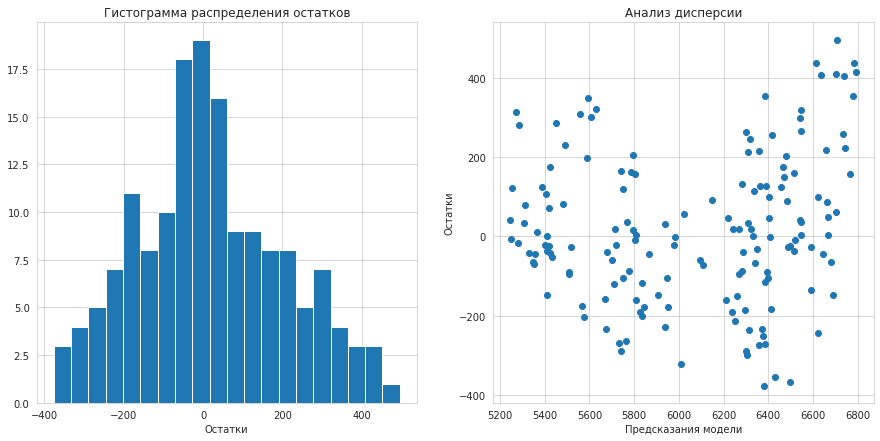

R² модели равен 0.87
MSE модели равен 35762.78
RMSE модели равен 189.11
MAE модели равен 148.57


In [141]:
model_lr4 = LinearRegression()
model_lr4.fit(X_train, y_train)
predictions = model_lr4.predict(X_test)

#оценка качества - построение графиков остатков
residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].hist(residuals, bins=20)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

metrics(y_test, predictions)

**Выводы:**
1. Коэффициент детерминации стал ближе к 1, 0.87 - наибольшее значение среди всех моделей
2. Метрики MSE, RMSE, MAE в модели 4 наименьшие в сравнении с предыдущими моделями, что говорит в пользу большей точности данной модели
3. Остатки распределены нормально, наиболее частое значение равно 0 и не смещено
4. Дисперсия распределена более равномерно, чем в предыдущих моделях. 

Таким образом, лучшая из моделей - модель 4. Рассчитаем ее новерительный интервал:

In [142]:
#доверительный интервал

lower_quantile = residuals.quantile(0.025)
upper_quantile = residuals.quantile(0.975)
print(f'Квантили ошибок модели: {lower_quantile} и {upper_quantile}')

Квантили ошибок модели: -302.15543523416517 и 408.5004240192172


In [143]:
#добавим недостающие признаки по характеристикам корма
cows['feed_unit'] = ferma['feed_unit'].mean() * 1.05
cows['feed_unit2'] = cows['feed_unit'] **2

cows['crude_protein_gr'] = ferma['crude_protein_gr'].mean() * 1.05

cows['sugar_protein_proportion'] = ferma['sugar_protein_proportion'].mean() * 1.05
cows['spp'] = cows['sugar_protein_proportion'].apply(lambda x: 'more_0.91' if x > 0.91 else 'less_0.91')

In [144]:
X_cows_ohe = encoder3.transform(cows[cat])
X_cows_scaled = scaler3.transform(cows[num])

X_cows_ohe = pd.DataFrame(X_cows_ohe, columns=encoder3_names)
X_cows_scaled = pd.DataFrame(X_cows_scaled, columns=num)

X_cows = pd.concat([X_cows_ohe, X_cows_scaled], axis=1)

In [145]:
predictions = model_lr4.predict(X_cows)

for i in range(len(cows)):
    cows.loc[i, 'yield_kg'] = predictions[i]
    
cows['yield_kg']

0     6545.324150
1     6244.215683
2     6273.826642
3     6673.160202
4     6540.411788
5     6520.112424
6     6545.324150
7     6454.011541
8     6273.826642
9     6336.080942
10    6527.648929
11    6559.064228
12    6806.646961
13    6081.049878
14    6273.826642
15    6640.251362
16    6330.195894
17    6540.421547
18    6502.918650
19    6540.411788
Name: yield_kg, dtype: float64

In [146]:
cows.loc[cows['yield_kg'] > 6305]

breed    pasture dad_breed  dad_name  milk_fat  milk_protein  \
0    Вис Бик Айдиал  холмистое    Айдиал  Геркулес      3.58         3.076   
3   РефлешнСоверинг  холмистое    Айдиал    Буйный      3.40         3.061   
4   РефлешнСоверинг  равнинное    Айдиал    Буйный      3.64         3.074   
5   РефлешнСоверинг  равнинное   Соверин  Геркулес      3.63         3.053   
6    Вис Бик Айдиал  холмистое    Айдиал  Геркулес      3.58         3.076   
7    Вис Бик Айдиал  равнинное   Соверин    Буйный      3.57         3.079   
9   РефлешнСоверинг  холмистое    Айдиал    Буйный      3.40         3.079   
10   Вис Бик Айдиал  холмистое   Соверин  Соловчик      3.73         3.055   
11  РефлешнСоверинг  равнинное   Соверин  Геркулес      3.73         3.073   
12   Вис Бик Айдиал  холмистое    Айдиал  Геркулес      3.68         3.046   
15  РефлешнСоверинг  холмистое    Айдиал    Буйный      3.40         3.065   
16   Вис Бик Айдиал  холмистое   Соверин  Соловчик      3.73         3.079   
17  РефлешнСоверинг  равнинное   Соверин  Геркулес      3.77         3.053   
18   Вис Бик Айдиал  равнинное   Соверин    Буйный      3.34         3.069   
19  РефлешнСоверинг  равнинное    Айдиал    Буйный      3.64         3.074   

    older_than_2  feed_unit  feed_unit2  crude_protein_gr  \
0           True  15.271073  233.205675       2019.532273   
3           True  15.271073  233.205675       2019.532273   
4           True  15.271073  233.205675       2019.532273   
5          False  15.271073  233.205675       2019.532273   
6           True  15.271073  233.205675       2019.532273   
7           True  15.271073  233.205675       2019.532273   
9          False  15.271073  233.205675       2019.532273   
10          True  15.271073  233.205675       2019.532273   
11          True  15.271073  233.205675       2019.532273   
12          True  15.271073  233.205675       2019.532273   
15          True  15.271073  233.205675       2019.532273   
16          True  15.271073  233.205675       2019.532273   
17         False  15.271073  233.205675       2019.532273   
18          True  15.271073  233.205675       2019.532273   
19          True  15.271073  233.205675       2019.532273   

    sugar_protein_proportion        spp     yield_kg  
0                   0.958772  more_0.91  6545.324150  
3                   0.958772  more_0.91  6673.160202  
4                   0.958772  more_0.91  6540.411788  
5                   0.958772  more_0.91  6520.112424  
6                   0.958772  more_0.91  6545.324150  
7                   0.958772  more_0.91  6454.011541  
9                   0.958772  more_0.91  6336.080942  
10                  0.958772  more_0.91  6527.648929  
11                  0.958772  more_0.91  6559.064228  
12                  0.958772  more_0.91  6806.646961  
15                  0.958772  more_0.91  6640.251362  
16                  0.958772  more_0.91  6330.195894  
17                  0.958772  more_0.91  6540.421547  
18                  0.958772  more_0.91  6502.918650  
19                  0.958772  more_0.91  6540.411788

**Прогноз:**
1. Согласно модели все коровы из списка на продажу могут давать больше 6000 кг в год. 
2. Если ошибка - положительное значение, это значит, что истинное значение может быть больше предсказанного, данная неточность будет не так критична для отбора коров. Когда ошибка - отрицательное число, это значает, что предсказанный удой может быть больше, чем истинно значение. 
2. Если расставлять приоритет о покупке коров, то необходимо учитывать, что модель могла ошибиться, увеличив действительно ожидаемый удой на 302 кг. Когда условием фермера является обязательный удой больше 6000 кг в год, в приоритет можно отнести тех коров, которые дают больше 6305 кг, то есть включаем необходимую норму в 6000 кг + возможную ошибку в 305 кг. Таких коров 15 штук. 

<a id='seven'></a>
## Обучение модели логистической регрессии

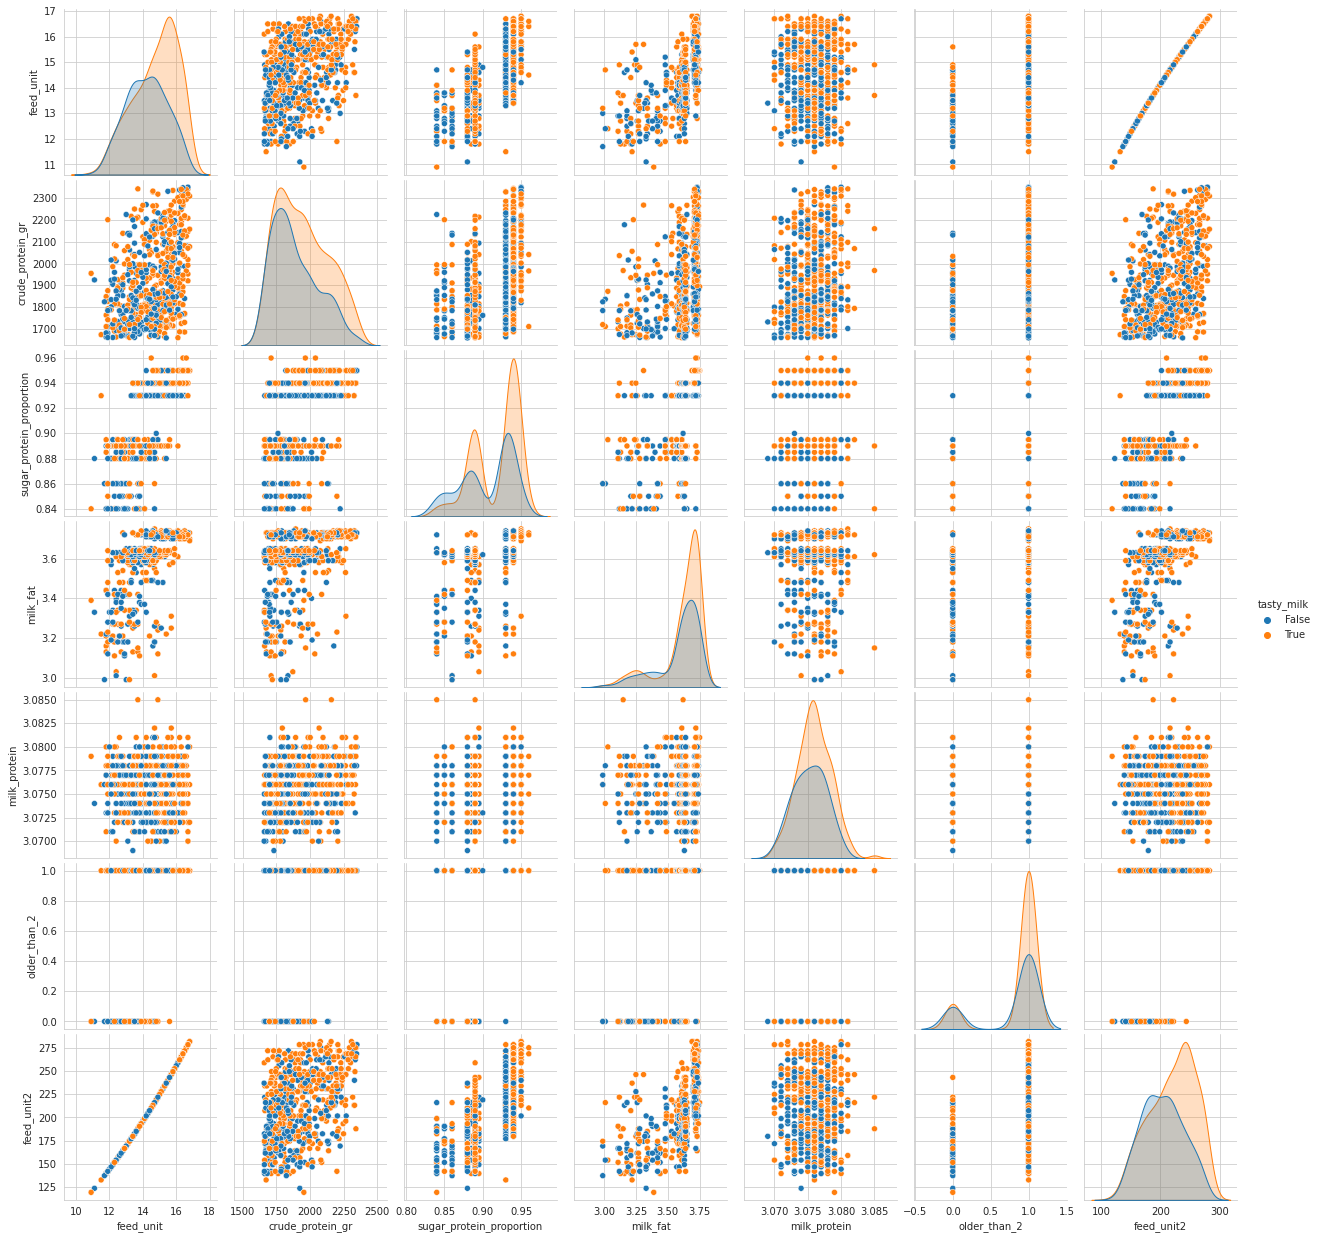

In [147]:
sns.pairplot(ferma.drop(['id', 'yield_kg'], axis=1), hue='tasty_milk');

In [148]:
#сохраняем входные и целевой признаки
X = ferma.drop(['id', 'yield_kg', 'tasty_milk'], axis=1)
y = ferma['tasty_milk']

Исключим удой молока из модели из-за мультиколлинераности с многими признаками, при этом данные по удою в датасете со стадом на продажу - данные, полученные на основе модели, то есть существует вероятность, что они неточные, все остальные признаки, так как они могут оказать влияние на вкус молока. 

Создадим функцию для изменения входных признаков модели:

In [149]:
def log_model(X, y, cat, num):
    RANDOM_STATE = 77
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat])
    X_test_ohe = encoder.transform(X_test[cat])
    
    encoder_names = encoder.get_feature_names()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num])
    X_test_scaled = scaler.transform(X_test[num])
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    clf = LogisticRegression()
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    print('Accuracy = ', acc)
    print('Precision = ', prec)
    print('Recall = ', rec)
    
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted');

Accuracy =  0.6012658227848101
Precision =  0.6134453781512605
Recall =  0.8111111111111111


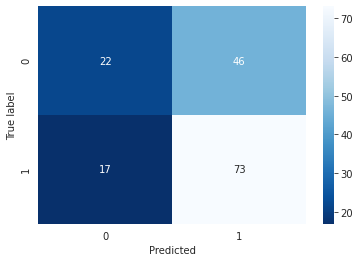

In [150]:
cat = ['older_than_2', 'dad_name', 'dad_breed', 'pasture', 'breed']
num = ['feed_unit', 'crude_protein_gr', 'sugar_protein_proportion', 'milk_fat', 'milk_protein']

log_model(X, y, cat, num)

Accuracy =  0.620253164556962
Precision =  0.625
Recall =  0.8333333333333334


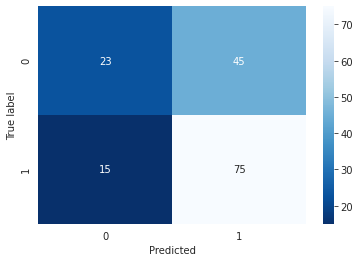

In [151]:
cat = ['older_than_2', 'dad_name', 'pasture', 'breed']
num = ['feed_unit', 'crude_protein_gr', 'sugar_protein_proportion', 'milk_fat', 'milk_protein']

log_model(X, y, cat, num)

In [152]:
cat = ['older_than_2', 'dad_name', 'dad_breed', 'pasture', 'breed']
num = ['feed_unit', 'crude_protein_gr', 'sugar_protein_proportion', 'milk_fat', 'milk_protein']

RANDOM_STATE = 77

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat])
X_test_ohe = encoder.transform(X_test[cat])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num])
X_test_scaled = scaler.transform(X_test[num])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [153]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")

x0_True             : +0.033900
x1_Буйный           : -0.347761
x1_Геркулес         : -0.375595
x1_Соловчик         : -0.484696
x2_Соверин          : -0.154406
x3_холмистое        : +0.572756
x4_РефлешнСоверинг  : -0.007611
feed_unit           : +0.408415
crude_protein_gr    : +0.024314
sugar_protein_proportion: +0.170920
milk_fat            : -0.081753
milk_protein        : +0.192477


In [154]:
cat = ['older_than_2', 'dad_name', 'pasture', 'breed']
num = ['feed_unit', 'crude_protein_gr', 'sugar_protein_proportion', 'milk_fat', 'milk_protein']

RANDOM_STATE = 77

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat])
X_test_ohe = encoder.transform(X_test[cat])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num])
X_test_scaled = scaler.transform(X_test[num])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

#изменим порог принадлежности к классам для сведения ошибки к 0 
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba, predictions),
             columns = ['y_valid', 'y_proba', 'y_pred']).sort_values(by='y_proba',ascending=False)

print(data.head(10))

     y_valid   y_proba  y_pred
89      True  0.872167    True
126     True  0.864889    True
85      True  0.864820    True
59      True  0.841829    True
47      True  0.839237    True
2       True  0.838294    True
48      True  0.832798    True
148     True  0.832392    True
78      True  0.830162    True
60      True  0.827485    True


In [155]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 1000,endpoint=False)]

columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 0 if x < i else 1)
    
data.sample(5)

y_valid   y_proba  y_pred  y_pred_0.5  y_pred_0.51  y_pred_0.52  \
49      True  0.536915    True           1            1            1   
142     True  0.726481    True           1            1            1   
149     True  0.548620    True           1            1            1   
79     False  0.605443    True           1            1            1   
46      True  0.727156    True           1            1            1   

     y_pred_0.53  y_pred_0.54  y_pred_0.55  y_pred_0.56  ...  y_pred_0.9  \
49             1            0            0            0  ...           0   
142            1            1            1            1  ...           0   
149            1            1            0            0  ...           0   
79             1            1            1            1  ...           0   
46             1            1            1            1  ...           0   

     y_pred_0.91  y_pred_0.92  y_pred_0.93  y_pred_0.94  y_pred_0.95  \
49             0            0            0            0            0   
142            0            0            0            0            0   
149            0            0            0            0            0   
79             0            0            0            0            0   
46             0            0            0            0            0   

     y_pred_0.96  y_pred_0.97  y_pred_0.98  y_pred_0.99  
49             0            0            0            0  
142            0            0            0            0  
149            0            0            0            0  
79             0            0            0            0  
46             0            0            0            0  

[5 rows x 53 columns]

In [156]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_'+str(i)])
    if cm[0][1] == 0:
        print('Порог = ',i ,'Precision = ', precision_score(y_test, data['y_pred_'+str(i)]), 'TP =', cm[1][1])
        break

Порог =  0.85 Precision =  1.0 TP = 3


Accuracy =  0.44936708860759494
Precision =  1.0
Recall =  0.03333333333333333


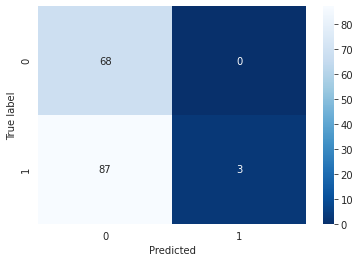

In [157]:
acc = accuracy_score(y_test, data['y_pred_0.85'])
pre = precision_score(y_test, data['y_pred_0.85'])
rec = recall_score(y_test, data['y_pred_0.85'])

print('Accuracy = ', acc)
print('Precision = ', pre)
print('Recall = ', rec)

cm = confusion_matrix(y_test, data['y_pred_0.85'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Значением порога было выбрано 0.85, при нем precision стало равняться 1, при этом recall стал практически равен 0. Accuracy также сократилось: с 0.65 до 0.45. 

In [158]:
X_cows = cows

X_cows_ohe = encoder.transform(X_cows[cat])
X_cows_scaled = scaler.transform(X_cows[num])
    

X_cows_ohe = pd.DataFrame(X_cows_ohe, columns=encoder_col_names)
X_cows_scaled = pd.DataFrame(X_cows_scaled, columns=num)

X_cows = pd.concat([X_cows_ohe, X_cows_scaled], axis=1)
    
y_pred = clf.predict_proba(X_cows)[:,1]

cows['y_pred'] = y_pred
cows['tasty_milk'] = cows['y_pred'].apply(lambda x: 'tasty' if x >= 0.85 else 'not_tasty')
cows

breed    pasture dad_breed  dad_name  milk_fat  milk_protein  \
0    Вис Бик Айдиал  холмистое    Айдиал  Геркулес      3.58         3.076   
1    Вис Бик Айдиал  равнинное   Соверин    Буйный      3.54         3.081   
2   РефлешнСоверинг  равнинное   Соверин     Барин      3.59         3.074   
3   РефлешнСоверинг  холмистое    Айдиал    Буйный      3.40         3.061   
4   РефлешнСоверинг  равнинное    Айдиал    Буйный      3.64         3.074   
5   РефлешнСоверинг  равнинное   Соверин  Геркулес      3.63         3.053   
6    Вис Бик Айдиал  холмистое    Айдиал  Геркулес      3.58         3.076   
7    Вис Бик Айдиал  равнинное   Соверин    Буйный      3.57         3.079   
8   РефлешнСоверинг  равнинное   Соверин     Барин      3.59         3.074   
9   РефлешнСоверинг  холмистое    Айдиал    Буйный      3.40         3.079   
10   Вис Бик Айдиал  холмистое   Соверин  Соловчик      3.73         3.055   
11  РефлешнСоверинг  равнинное   Соверин  Геркулес      3.73         3.073   
12   Вис Бик Айдиал  холмистое    Айдиал  Геркулес      3.68         3.046   
13   Вис Бик Айдиал  холмистое   Соверин     Барин      3.42         3.075   
14  РефлешнСоверинг  равнинное   Соверин     Барин      3.59         3.074   
15  РефлешнСоверинг  холмистое    Айдиал    Буйный      3.40         3.065   
16   Вис Бик Айдиал  холмистое   Соверин  Соловчик      3.73         3.079   
17  РефлешнСоверинг  равнинное   Соверин  Геркулес      3.77         3.053   
18   Вис Бик Айдиал  равнинное   Соверин    Буйный      3.34         3.069   
19  РефлешнСоверинг  равнинное    Айдиал    Буйный      3.64         3.074   

    older_than_2  feed_unit  feed_unit2  crude_protein_gr  \
0           True  15.271073  233.205675       2019.532273   
1          False  15.271073  233.205675       2019.532273   
2           True  15.271073  233.205675       2019.532273   
3           True  15.271073  233.205675       2019.532273   
4           True  15.271073  233.205675       2019.532273   
5          False  15.271073  233.205675       2019.532273   
6           True  15.271073  233.205675       2019.532273   
7           True  15.271073  233.205675       2019.532273   
8           True  15.271073  233.205675       2019.532273   
9          False  15.271073  233.205675       2019.532273   
10          True  15.271073  233.205675       2019.532273   
11          True  15.271073  233.205675       2019.532273   
12          True  15.271073  233.205675       2019.532273   
13         False  15.271073  233.205675       2019.532273   
14          True  15.271073  233.205675       2019.532273   
15          True  15.271073  233.205675       2019.532273   
16          True  15.271073  233.205675       2019.532273   
17         False  15.271073  233.205675       2019.532273   
18          True  15.271073  233.205675       2019.532273   
19          True  15.271073  233.205675       2019.532273   

    sugar_protein_proportion        spp     yield_kg    y_pred tasty_milk  
0                   0.958772  more_0.91  6545.324150  0.764573  not_tasty  
1                   0.958772  more_0.91  6244.215683  0.732918  not_tasty  
2                   0.958772  more_0.91  6273.826642  0.664928  not_tasty  
3                   0.958772  more_0.91  6673.160202  0.526964  not_tasty  
4                   0.958772  more_0.91  6540.411788  0.606937  not_tasty  
5                   0.958772  more_0.91  6520.112424  0.214988  not_tasty  
6                   0.958772  more_0.91  6545.324150  0.764573  not_tasty  
7                   0.958772  more_0.91  6454.011541  0.705696  not_tasty  
8                   0.958772  more_0.91  6273.826642  0.664928  not_tasty  
9                   0.958772  more_0.91  6336.080942  0.816784  not_tasty  
10                  0.958772  more_0.91  6527.648929  0.309472  not_tasty  
11                  0.958772  more_0.91  6559.064228  0.568634  not_tasty  
12                  0.958772  more_0.91  6806.646961  0.222579  not_tasty  
13                  0.958772 

In [159]:
cows.loc[(cows['tasty_milk'] == 'tasty')]

Empty DataFrame
Columns: [breed, pasture, dad_breed, dad_name, milk_fat, milk_protein, older_than_2, feed_unit, feed_unit2, crude_protein_gr, sugar_protein_proportion, spp, yield_kg, y_pred, tasty_milk]
Index: []

Согласно модели среди всех коров по прогнозам нет коровы, которая давала бы вкусное молоко. 

<a id='eight'></a>
## Итоговые выводы

*Результаты работы моделей и рекомендации:*

Полученные результаты на основе моделей представлены в столбцах ниже: в первом предсказан ожидаемый удой за год, а во втором - вкусное ли будет молоко. Среди коров на продажу не было обнаружено таких, у которых с высокой вероятностью ожидается вкусное молоко. Таким образом, нет таких коров, которые бы с минимальным риском удовлетворяли всем условиям, поставленным заказчиком.

В модели был установлен высокий порог, который помогает исключить ложно-положительные результаты для достижения точности определения вкусное ли молоко. В связи с этим ни одна из коров стада на продажу не соответствует строгим критериям. С уменьшением порога риск получить ложно-положительный результат увеличивается. При этом около 15 коров удовлетворяют критерию удойности даже с учетом возможной ошибки.

Для приобретения в дальнейшем коровы для хозяйства Вольный луг рекомендуем или рассмотреть других коров от ассоциации "ЭкоФерма", или же коров от другого отца производителя или у другой ассоциации (при расчет допустимых экономических рисков), или дополнить модель новыми признаками, например, данными о породе матери, ее удойности и вкусе молока, или попробовать применить другую классификационную модель, которая ищет более сложные зависимости.

In [160]:
cows[['yield_kg', 'tasty_milk']]

yield_kg tasty_milk
0   6545.324150  not_tasty
1   6244.215683  not_tasty
2   6273.826642  not_tasty
3   6673.160202  not_tasty
4   6540.411788  not_tasty
5   6520.112424  not_tasty
6   6545.324150  not_tasty
7   6454.011541  not_tasty
8   6273.826642  not_tasty
9   6336.080942  not_tasty
10  6527.648929  not_tasty
11  6559.064228  not_tasty
12  6806.646961  not_tasty
13  6081.049878  not_tasty
14  6273.826642  not_tasty
15  6640.251362  not_tasty
16  6330.195894  not_tasty
17  6540.421547  not_tasty
18  6502.918650  not_tasty
19  6540.411788  not_tasty

*Выводы о моделях линейной регрессии и логистической регрессии:*

Для улучшения регрессионной модели были использованы следующие преобразования:
- Бинаризация, то есть преобразования количественной переменной в категориальную путем разделения на интервалы.
- Возведение данных в квадрат для превращения нелинейной зависимости в линейную. 

Улучшить в большей степени результаты регрессионной модели можно:
- Расширив датасет и дополнив его новой информацией о других коровах или о новых признаках
- Добавив новые признаки, например, при помощи конструирования данных из уже существующих
- Исключение выбросов из модели или использование другой модели, менее чувствительной к выбросам.

При анализе рисков и экономических расчетов важны метрики recall и precision, так как они помогают определить цену ошибки, а также приобретаемую выгоду при введении определенных изменений. В зависимости от того, насколько неженателен ложно-положительный результат или насколько важно определить всю полноту верных ответов, даже при допущении ошибок первого рода.

*Предобработка данных и анализ данных:*

- Названия столбцов были приведены к правильному формату, были удалены явные и неявные дубликаты, исправлено аномальное значение, изменены типы данных, а также объединены два датасеты. 
- Характеристики коров фермера и стада на продажу, а также типа их пастбища примерно одинаковые.
- Коровы фермера:
    - в среднем дают больше 6100 кг молока в год
    - примерно 60% дают вкусное молоко.
    - жирность их молока составляет 3.6-3.7%, а содержание белка в среднем 3.07
    - получают питательный корм с ЭКЕ в среднем выше 14 единиц и понижено содержание сырого протеина
    - СПО в корме коров в рамках нормы и у большинства близится к предпочитаемому показателю - единице
- Нелинейная связь между удоем и ЭКЕ и СПО была преобразована в линейную, что позволило улучшить точность модели. 
- Также существует линейная связь между удоем и жирностью молока и возрастом коровы и средняя связь между удоем и сырым протеином.
- Ярко выраженной мультиколлинеарности, которая могла бы повлиять на результат модели, между числовыми признаками не наблюдалось.